## **Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

## **Loading Data**

In [2]:
# Mounting G-Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Function to generate dataset from mother folder path
def generate_dataset(path):

    Dataset = np.loadtxt(path, skiprows = 1,delimiter='\t')

    return Dataset

## **Regression Task**

### **Performance Metrics**

In [13]:
# Performance Metrics for Regression Task

def pearson(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    r = np.sum((y - y_mean)*(x-x_mean))/np.sqrt(np.sum((y - y_mean)**2) * np.sum((x-x_mean)**2))
    return r

def MSE(actual_y,pred_y):
    return np.mean((actual_y - pred_y)**2)

def MAE(actual_y,pred_y):
    return np.mean(np.abs(actual_y - pred_y))

def plot_predictions(y_actual, y_pred, title):
    coefficients = np.polyfit(y_actual, y_pred, 1)
    line = np.polyval(coefficients, y_actual)
    r = pearson(y_actual, y_pred)
    mse = MSE(y_actual, y_pred)
    mae = MAE(y_actual, y_pred)
    oracle_based_line_x = np.linspace(np.min(y_actual), np.max(y_actual), 1000)
    oracle_based_line_y = oracle_based_line_x.copy()
    plt.scatter(y_actual, y_pred)
    plt.plot(oracle_based_line_x, oracle_based_line_y, 'r--', label = 'Oracle Based Test')
    plt.plot(y_actual, line,color = 'k', linestyle='--',label = 'Line of Best Fit')
    plt.title(title)
    plt.text(oracle_based_line_x[-250], oracle_based_line_y[0], f'$r = {r:0.3f}$\n$mse = {mse:0.3f}$\n$mae = {mae:0.3f}$', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.legend()

def plot_all_predictions(y1_actual, y1_pred, y2_actual, y2_pred, y3_actual, y3_pred):
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    plot_predictions(y1_actual, y1_pred, '$y^1$')
    plt.subplot(1,3,2)
    plot_predictions(y2_actual, y2_pred, '$y^2$')
    plt.subplot(1,3,3)
    plot_predictions(y3_actual, y3_pred, '$y^3$')
    plt.show()


### **Q1. Multilinear Regression**

#### **Loading Data**

In [ ]:
# Create Dataset

Regression_multi_Linear_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 01/Data/Regression_Linear_multi/regression_data_multilinear_group_24_train.txt'

Regression_multi_Linear_Dataset = generate_dataset(Regression_multi_Linear_path)

In [ ]:
n_features = 10 # Given

Regression_multi_Linear_X = Regression_multi_Linear_Dataset[:,:n_features]
Regression_multi_Linear_y = Regression_multi_Linear_Dataset[:,n_features:]

print(f'Dataset : number of samples = {Regression_multi_Linear_X.shape[0]}, number of features = {Regression_multi_Linear_X.shape[1]}')
print(f'Dataset : number of samples = {Regression_multi_Linear_y.shape[0]}, Dimension of Target = {Regression_multi_Linear_y.shape[1]}')

Dataset : number of samples = 14000, number of features = 10
Dataset : number of samples = 14000, Dimension of Target = 3


In [ ]:
# Splitting the Dataset

split_size = 0.7
n = Regression_multi_Linear_X.shape[0]
split_n = int(split_size * n)

X_train_linear_regression = Regression_multi_Linear_X[:split_n,:].copy()
Y_train_linear_regression = Regression_multi_Linear_y[:split_n,:].copy()

X_test_linear_regression = Regression_multi_Linear_X[split_n:, :].copy()
Y_test_linear_regression = Regression_multi_Linear_y[split_n:, :].copy()

#### **Algorithm**

Let Dataset $D = \{ (X_j, Y_j) \}_{j=1}^N$

$$
X_j = \left(\begin{array}{cc}
x^1_j\\
x^2_j\\
x^3_j\\
x^4_j\\
x^5_j\\
x^6_j\\
x^7_j\\
x^8_j\\
x^9_j\\
x^{10}_j\\
\end{array}\right);
Y_j = \left(\begin{array}{cc}
y^1_j\\
y^2_j\\
y^3_j\\
\end{array}\right)
$$

$\ell_2$ Loss : $||h(x) - y||_2^2$

where, h(x) = predicted target, y = actual target


For each dimension of target

**For $\ell_2$ Loss:**

Gradient of Loss w.r.t. each $y^i$ is:

$ \nabla_WL = \frac{1}{N}\sum_{j=1}^N 2 (W_i^TX_j - y_j^i) X_j $
where, $W_i$ is the Weight Vector corresponding to $i^{th}$ dimension of target($Y$) : $y^i$

In [ ]:
class Regression_multi_Linear:
  def __init__(self):
    self.coef_ = None
    self.intercept = None
    self.losses = [[], [], []]

  def fit(self,X_train,y_train,learning_rate = 0.1,threshold = 1e-6):
    X_train = np.insert(X_train,10,1,axis=1)

    # Initialize W_1,W_2,W_3:
    np.random.seed(0)  # Set the seed for reproducibility
    W_1 = np.random.rand(11) * np.sqrt(1./11)
    W_2 = np.random.rand(11) * np.sqrt(1./11)
    W_3 = np.random.rand(11) * np.sqrt(1./11)


    W_matrix = [W_1,W_2,W_3]
    N = len(y_train)
    no_of_iterations = 201

    for epoch in range(no_of_iterations):
      for i in range(len(W_matrix)):
        gradient = 0
        epoch_loss = 0
        # Calculate gradient and loss
        for X,Y in zip(X_train,y_train):
          gradient += (2/N)*(np.dot(W_matrix[i],X) - Y[i])*X
          loss = (np.dot(W_matrix[i],X) - Y[i])**2
          epoch_loss += loss

        W_matrix[i] += -learning_rate*gradient

        # Store the loss of this epoch for this y
        self.losses[i].append(epoch_loss / N)

      # Print the losses at every 10th epoch
      if epoch % 10 == 0:
        print(f'Epoch {epoch}, Losses: {self.losses[0][-1]}, {self.losses[1][-1]}, {self.losses[2][-1]}')

    rows = [W[:-1] for W in W_matrix]
    self.coef_ = np.vstack((rows[0],rows[1],rows[2]))
    intercept = [W[-1] for W in W_matrix]
    self.intercept = np.array(intercept)

  def predict(self,X_train):
    W = self.coef_
    b = self.intercept
    y_predicted = np.dot(X_train,W.T) + b.T

    return y_predicted


In [ ]:
lr = Regression_multi_Linear()

lr.fit(X_train_linear_regression,Y_train_linear_regression)

Epoch 0, Losses: 115.82706694330989, 37.22220507193361, 186.3690337495311
Epoch 10, Losses: 14.144670813568414, 12.057042334866876, 10.399247403263706
Epoch 20, Losses: 10.385296738071974, 10.377423052331315, 9.3262354323789
Epoch 30, Losses: 9.414436308739838, 9.735340323648247, 9.054019555014701
Epoch 40, Losses: 9.068762871049682, 9.41117340454176, 8.924565279966423
Epoch 50, Losses: 8.896048201344161, 9.20797521049798, 8.840466494869602
Epoch 60, Losses: 8.787757261867792, 9.064975337827912, 8.780604201609917
Epoch 70, Losses: 8.712255925889067, 8.959248102636684, 8.736962131015115
Epoch 80, Losses: 8.657391494415835, 8.87957032150483, 8.70493185479847
Epoch 90, Losses: 8.616908794923726, 8.819085156059435, 8.6813751568676
Epoch 100, Losses: 8.586864915218403, 8.773035980966535, 8.664037945084393
Epoch 110, Losses: 8.564514625869451, 8.737931278983611, 8.651274444564638
Epoch 120, Losses: 8.547867714846362, 8.711150232882199, 8.641876676908977
Epoch 130, Losses: 8.535459005644567, 

In [ ]:
y_predicted = lr.predict(X_test_linear_regression)

# Actual
y1_actual = Y_test_linear_regression[:,0]
y2_actual = Y_test_linear_regression[:,1]
y3_actual = Y_test_linear_regression[:,2]

# Predicted
y1_predicted = y_predicted[:,0]
y2_predicted = y_predicted[:,1]
y3_predicted = y_predicted[:,2]

# losses
losses_y1 = lr.losses[0]
losses_y2 = lr.losses[1]
losses_y3 = lr.losses[2]

Text(0, 0.5, 'Loss')

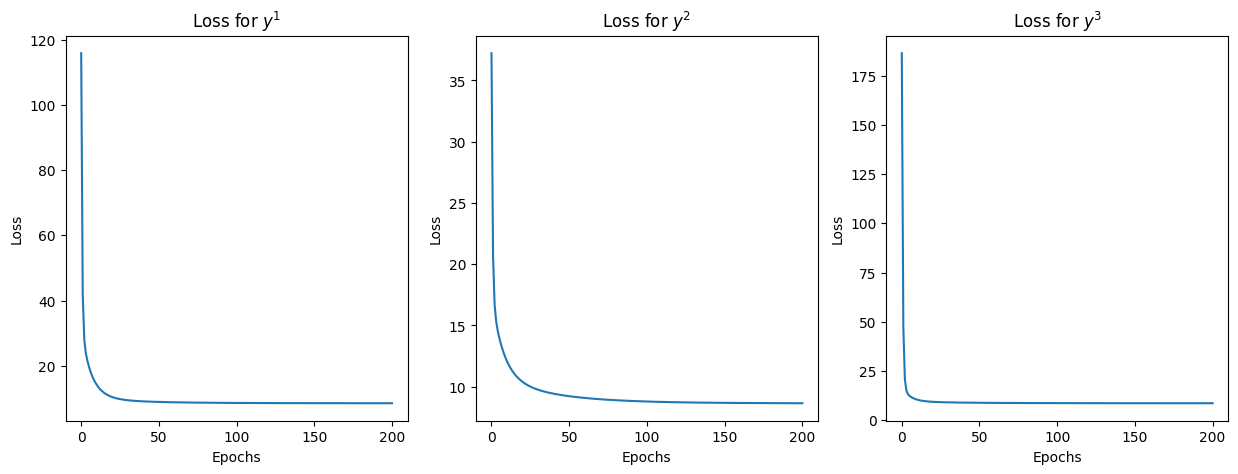

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.plot(losses_y1)
plt.title('Loss for $y^1$')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,3,2)
plt.plot(losses_y2)
plt.title('Loss for $y^2$')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1,3,3)
plt.plot(losses_y3)
plt.title('Loss for $y^3$')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# plt.savefig("/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_01/loss_vs_epoch.svg", format='svg')

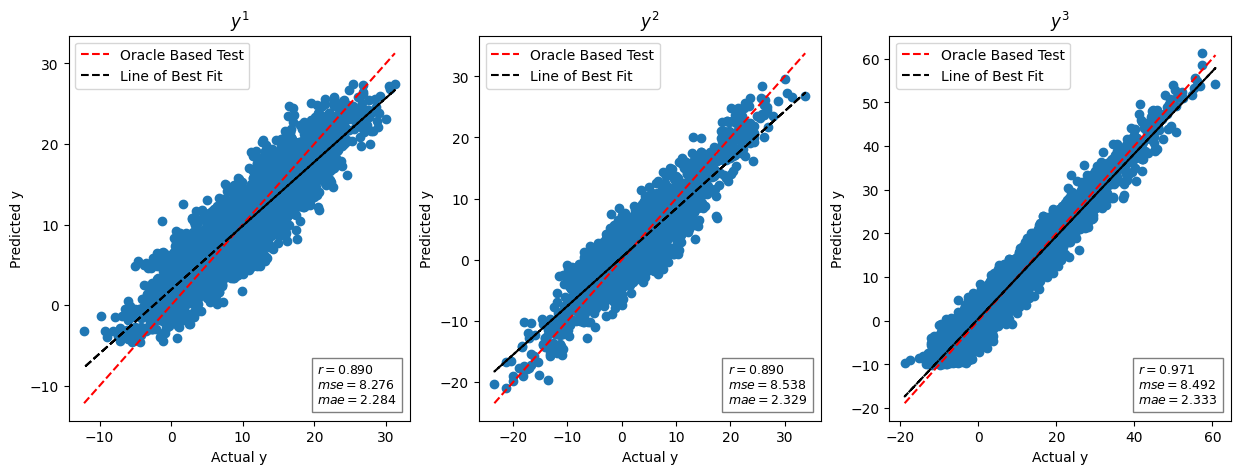

In [ ]:
plot_all_predictions(y1_actual, y1_predicted, y2_actual, y2_predicted, y3_actual, y3_predicted)

### **Q.2 Generalised Regression (Polynomial)**

#### **Loading Data**

In [ ]:
# Create Dataset

Regression_General_Multi_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 01/Data/Regression_General_Multi/regression_data_multiGen_group_24_train.txt'

Regression_General_Multi_Dataset = generate_dataset(Regression_General_Multi_path)

In [ ]:
n_features = 2 # Given

Regression_General_Multi_X = Regression_General_Multi_Dataset[:,:n_features]
Regression_General_Multi_y = Regression_General_Multi_Dataset[:,n_features:]

print(f'Dataset : number of samples = {Regression_General_Multi_X.shape[0]}, number of features = {Regression_General_Multi_X.shape[1]}')
print(f'Dataset : number of samples = {Regression_General_Multi_y.shape[0]}, Dimension of Target = {Regression_General_Multi_y.shape[1]}')

Dataset : number of samples = 14000, number of features = 2
Dataset : number of samples = 14000, Dimension of Target = 3


In [ ]:
# Splitting the Dataset

split_size = 0.8
n = Regression_General_Multi_X.shape[0]
split_n = int(split_size * n)

X_train_polynomial_regression = Regression_General_Multi_X[:split_n,:].copy()
Y_train_polynomial_regression = Regression_General_Multi_y[:split_n,:].copy()

X_test_polynomial_regression = Regression_General_Multi_X[split_n:, :].copy()
Y_test_polynomial_regression = Regression_General_Multi_y[split_n:, :].copy()

#### **Polynomial Regression**

Let Dataset $D = \{ (X_j, Y_j) \}_{j=1}^N$

$$
X_j = \left(\begin{array}{cc}
x^1_j\\
x^2_j
\end{array}\right);
Y_j = \left(\begin{array}{cc}
y^1_j\\
y^2_j\\
y^3_j
\end{array}\right)
$$

Let the polynomial function be : $\phi(X_j)$

$\ell_2$ Loss : $||h(x) - y||_2^2$

where, h(x) = predicted target, y = actual target

**For each dimension of target ($y^i$):**

**For $\ell_2$ Loss:**

$ L = \frac{1}{N} \sum_{j=1}^N (W_i^T\phi(X_j) - y_j^i)^2$

Gradient of Loss w.r.t. each $y^i$ is:

$ \nabla_WL = \frac{1}{N} \sum_{j=1}^N 2 (W_i^T\phi(X_j) - y_j^i) \phi(X_j) $
where, $W_i$ is the Weight Vector corresponding to $i^{th}$ dimension of target($Y$) : $y^i$

In [ ]:
class PolynomialRegression:

    def __init__(self, Phi_X_shape, learning_rate=0.1, n_epochs=100):
        # Initialize PolynomialRegression object with specified parameters
        self.Phi_X_shape = Phi_X_shape  # Shape of the feature vector after polynomial transformation
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.n_epochs = n_epochs  # Number of epochs for training
        self.W = None  # Coefficients for the linear regression model
        self.W_0 = np.random.randn(self.Phi_X_shape,1)  # Initialize coefficients for dimension 1 of y
        self.W_1 = np.random.randn(self.Phi_X_shape,1)  # Initialize coefficients for dimension 2 of y
        self.W_2 = np.random.randn(self.Phi_X_shape,1)  # Initialize coefficients for dimension 3 of y
        self.Loss_1_list = []  # List to store loss for dimension 1 of y during training
        self.Loss_2_list = []  # List to store loss for dimension 2 of y during training
        self.Loss_3_list = []  # List to store loss for dimension 3 of y during training

    def phi_x_polynomial(self, x):
        # Function to perform polynomial transformation on input data point
        out = np.zeros((self.Phi_X_shape, 1))  # Initialize the transformed feature vector
        # Perform polynomial transformation
        out[0] = x[0]
        out[1] = x[1]
        out[2] = x[0] * x[1]
        out[3] = x[0] ** 2
        out[4] = x[1] ** 2
        out[5] = x[0] ** 2 * x[1]
        out[6] = x[1] ** 2 * x[0]
        out[7] = x[0] ** 3
        out[8] = x[1] ** 3
        out[9] = 1
        return out

    def fit(self, X_train, Y_train):
        # Function to train the polynomial regression model
        N = X_train.shape[0]  # Number of training samples
        for epoch in range(self.n_epochs):
            Loss_1 = 0  # Initialize loss for dimension 1 of y
            Loss_2 = 0  # Initialize loss for dimension 2 of y
            Loss_3 = 0  # Initialize loss for dimension 3 of y

            # Gradient initialised to 0
            grad_L_y_0 = 0  # Gradient for dimension 1 of y
            grad_L_y_1 = 0  # Gradient for dimension 2 of y
            grad_L_y_2 = 0  # Gradient for dimension 3 of y

            for i in range(X_train_polynomial_regression.shape[0]):
                # Compute gradients and losses for each training sample
                grad_L_y_0 += (2/N) * ((np.matmul(self.W_0.T,self.phi_x_polynomial(X_train[i])) - Y_train[i][0])*self.phi_x_polynomial(X_train[i]))
                grad_L_y_1 += (2/N) * ((np.matmul(self.W_1.T,self.phi_x_polynomial(X_train[i])) - Y_train[i][1])*self.phi_x_polynomial(X_train[i]))
                grad_L_y_2 += (2/N) * ((np.matmul(self.W_2.T,self.phi_x_polynomial(X_train[i])) - Y_train[i][2])*self.phi_x_polynomial(X_train[i]))

                Loss_1 += (1/N) * ((np.matmul(self.W_0.T,self.phi_x_polynomial(X_train[i])) - Y_train[i][0])**2)
                Loss_2 += (1/N) * ((np.matmul(self.W_1.T,self.phi_x_polynomial(X_train[i])) - Y_train[i][1])**2)
                Loss_3 += (1/N) * ((np.matmul(self.W_2.T,self.phi_x_polynomial(X_train[i])) - Y_train[i][2])**2)

            # Update Weights
            self.W_0 -= self.learning_rate * grad_L_y_0
            self.W_1 -= self.learning_rate * grad_L_y_1
            self.W_2 -= self.learning_rate * grad_L_y_2

            if (epoch+1)%10==0:
                # Print loss every 10 epochs
                print(f'epoch : {epoch+1}/{self.n_epochs} , Loss_1 : {Loss_1[0][0]}, Loss_2 : {Loss_2[0][0]}, Loss_3 : {Loss_3[0][0]} ')

            # Append losses to respective lists
            self.Loss_1_list.append(Loss_1[0][0])
            self.Loss_2_list.append(Loss_2[0][0])
            self.Loss_3_list.append(Loss_3[0][0])

    def predict(self, X_test):
        # Function to predict output for test data
        self.W = np.vstack((self.W_0.T, self.W_1.T, self.W_2.T))  # Combine coefficients for all dimensions of y
        phi_X_test = np.squeeze(np.array([self.phi_x_polynomial(x) for x in X_test]),axis=2).T  # Perform polynomial transformation on test data
        pred_Y = np.matmul(self.W,phi_X_test)  # Predict output using the model
        return pred_Y

    def plot_losses(self):
        # Function to plot the losses during training
        plt.figure(figsize = (15,5))

        # Plot loss for dimension 1 of y
        plt.subplot(1,3,1)
        plt.plot(self.Loss_1_list)
        plt.title('Loss for $y^1$')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid()

        # Plot loss for dimension 2 of y
        plt.subplot(1,3,2)
        plt.plot(self.Loss_2_list)
        plt.title('Loss for $y^2$')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid()
        # Plot loss for dimension 3 of y
        plt.subplot(1,3,3)
        plt.plot(self.Loss_3_list)
        plt.title('Loss for $y^3$')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid()

In [ ]:
Poly_clf = PolynomialRegression(Phi_X_shape = 10,learning_rate=0.1,n_epochs=100)
Poly_clf.fit(X_train_polynomial_regression, Y_train_polynomial_regression)

epoch : 10/100 , Loss_1 : 14.273427840192783, Loss_2 : 11.847558934208223, Loss_3 : 18.55575985992615 
epoch : 20/100 , Loss_1 : 10.705247852831107, Loss_2 : 10.381439256169282, Loss_3 : 14.298406442553667 
epoch : 30/100 , Loss_1 : 9.770742635192516, Loss_2 : 9.911613304141898, Loss_3 : 12.697722422964437 
epoch : 40/100 , Loss_1 : 9.445520640966805, Loss_2 : 9.711566835420312, Loss_3 : 11.940743276802765 
epoch : 50/100 , Loss_1 : 9.295708398188882, Loss_2 : 9.604794547982952, Loss_3 : 11.543570048791329 
epoch : 60/100 , Loss_1 : 9.209455822106833, Loss_2 : 9.53851725434336, Loss_3 : 11.320178368172874 
epoch : 70/100 , Loss_1 : 9.152808902623732, Loss_2 : 9.493753852264225, Loss_3 : 11.186785025140548 
epoch : 80/100 , Loss_1 : 9.113189855214097, Loss_2 : 9.462200197916996, Loss_3 : 11.10280989257579 
epoch : 90/100 , Loss_1 : 9.084711692774155, Loss_2 : 9.439480499000506, Loss_3 : 11.047557431577204 
epoch : 100/100 , Loss_1 : 9.063999659784091, Loss_2 : 9.42294285744693, Loss_3 :

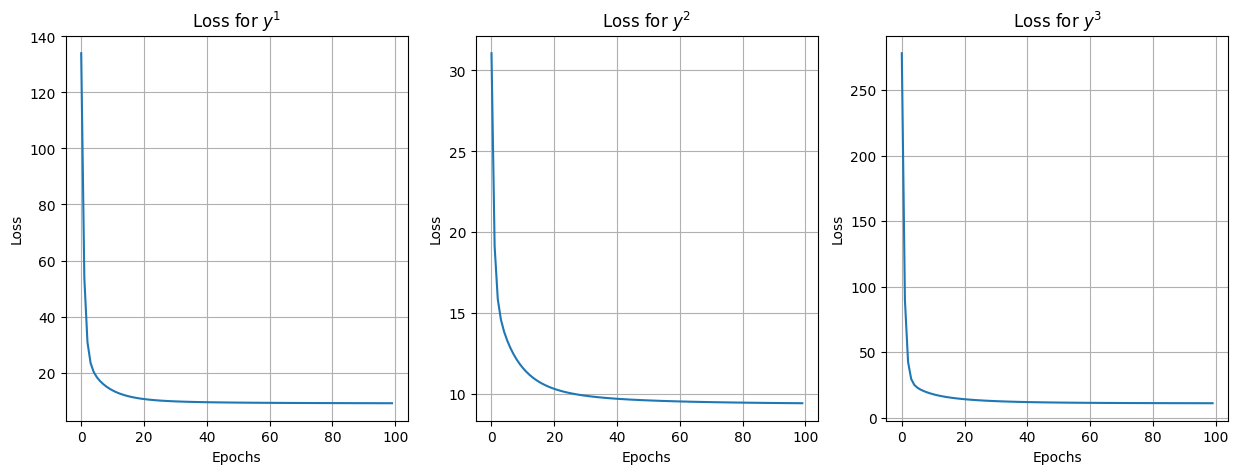

In [ ]:
Poly_clf.plot_losses()
plt.savefig('Poly_regression_cubic_kernel_loss_lr0.1.svg')

In [ ]:
pred_Y_Test = Poly_clf.predict(X_test_polynomial_regression)

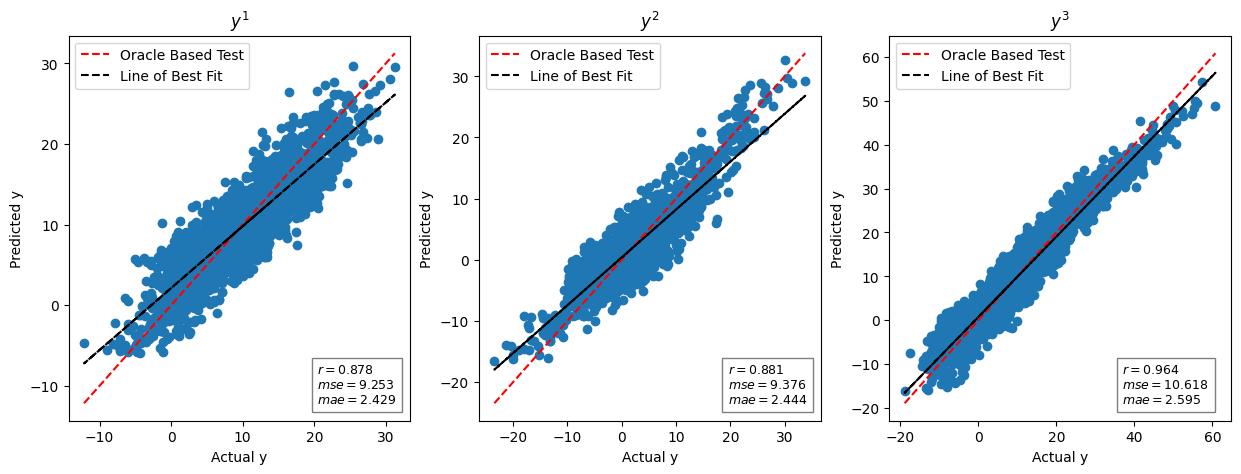

In [ ]:
plt.figure (figsize = (15,5))

actual_y = Y_test_polynomial_regression.T[0,:]
pred_y = pred_Y_Test[0,:]

# Fit a line to the data
coefficients = np.polyfit(actual_y, pred_y, 1)
# Generate y-values for the line
line = np.polyval(coefficients, actual_y)

r = pearson(actual_y,pred_y)
mse = MSE(actual_y,pred_y)
mae = MAE(actual_y,pred_y)
oracle_based_line_x = np.linspace(np.min(actual_y), np.max(actual_y), 1000)
oracle_based_line_y = oracle_based_line_x.copy()

plt.subplot(1,3,1)
plt.scatter(actual_y, pred_y)
plt.plot(oracle_based_line_x, oracle_based_line_y, 'r--', label = 'Oracle Based Test')
plt.plot(actual_y, line,color = 'k', linestyle='--',label = 'Line of Best Fit')
plt.title(f'$y^1$')
plt.text(oracle_based_line_x[-250], oracle_based_line_y[0], f'$r = {r:0.3f}$\n$mse = {mse:0.3f}$\n$mae = {mae:0.3f}$', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.legend()

actual_y = Y_test_polynomial_regression.T[1,:]
pred_y = pred_Y_Test[1,:]

# Fit a line to the data
coefficients = np.polyfit(actual_y, pred_y, 1)
# Generate y-values for the line
line = np.polyval(coefficients, actual_y)

r = pearson(actual_y,pred_y)
mse = MSE(actual_y,pred_y)
mae = MAE(actual_y,pred_y)
oracle_based_line_x = np.linspace(np.min(actual_y), np.max(actual_y), 1000)
oracle_based_line_y = oracle_based_line_x.copy()

plt.subplot(1,3,2)
plt.scatter(actual_y, pred_y)
plt.plot(oracle_based_line_x, oracle_based_line_y, 'r--', label = 'Oracle Based Test')
plt.plot(actual_y, line,color = 'k', linestyle='--',label = 'Line of Best Fit')
plt.title(f'$y^2$')
plt.text(oracle_based_line_x[-250], oracle_based_line_y[0], f'$r = {r:0.3f}$\n$mse = {mse:0.3f}$\n$mae = {mae:0.3f}$', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.legend()


actual_y = Y_test_polynomial_regression.T[2,:]
pred_y = pred_Y_Test[2,:]

# Fit a line to the data
coefficients = np.polyfit(actual_y, pred_y, 1)
# Generate y-values for the line
line = np.polyval(coefficients, actual_y)

r = pearson(actual_y,pred_y)
mse = MSE(actual_y,pred_y)
mae = MAE(actual_y,pred_y)
oracle_based_line_x = np.linspace(np.min(actual_y), np.max(actual_y), 1000)
oracle_based_line_y = oracle_based_line_x.copy()

plt.subplot(1,3,3)
plt.scatter(actual_y, pred_y)
plt.plot(oracle_based_line_x, oracle_based_line_y, 'r--', label = 'Oracle Based Test')
plt.plot(actual_y, line,color = 'k', linestyle='--',label = 'Line of Best Fit')
plt.title(f'$y^3$')
plt.text(oracle_based_line_x[-300], oracle_based_line_y[0], f'$r = {r:0.3f}$\n$mse = {mse:0.3f}$\n$mae = {mae:0.3f}$', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.legend()

plt.savefig('Poly_regression_cubic_kernel_correlation_plot_lr_0.1.svg')

The given problem is a Regression Problem with  with 3 targets.

The problem is solved by using Polynomial Kernels and analysis is done  by increasing the degree of polynomial kernel. The Performance Varies Greatly with the degree.

**The following Polynomial Kernels are used:**

$$
\begin{array}{cc cc}
\phi_1(X_j) & = & \left(\begin{array}{cc}
x^1_j\\
x^2_j\\
x^1_j x^2_j\\
(x^1_j)^2\\
(x^2_j)^2\\
1
\end{array}\right)
& \phi_2(X_j) = \left(\begin{array}{cc}
x^1_j\\
x^2_j\\
x^1_j x^2_j\\
(x^1_j)^2\\
(x^2_j)^2\\
(x^1_j)^2*(x^2_j)\\
(x^2_j)^2*(x^1_j)\\
(x^1_j)^3\\
(x^1_j)^3\\
1
\end{array}\right)
\end{array}
$$

where $\phi_1(X_j)$ and $\phi_2(X_j)$ are polynomial kernels of degree 2 and 3 respectively

### **Q.3 Generalised Regression (Non-Polynomial)**

#### **Loading Data**

In [4]:
# Create Dataset (Example Usage)

Regression_Non_linear_Uni_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 01/Data/Regression_Non_linear_Uni/regression_data_uni_group_24_train.txt'

Regression_Non_linear_Uni_Dataset = generate_dataset(Regression_Non_linear_Uni_path)

In [5]:
Regression_Non_linear_Uni_X = Regression_Non_linear_Uni_Dataset[:,:5]
Regression_Non_linear_Uni_y = Regression_Non_linear_Uni_Dataset[:,5:]

print(f'Dataset : number of samples = {Regression_Non_linear_Uni_X.shape[0]}, number of features = {Regression_Non_linear_Uni_X.shape[1]}')
print(f'Dataset : number of samples = {Regression_Non_linear_Uni_y.shape[0]}, Dimension of Target = {Regression_Non_linear_Uni_y.shape[1]}')

Dataset : number of samples = 7000, number of features = 5
Dataset : number of samples = 7000, Dimension of Target = 1


In [6]:
# Splitting the Dataset

split_size = 0.8
n = Regression_Non_linear_Uni_X.shape[0]
split_n = int(split_size * n)

X_train_Non_linear_Uni = Regression_Non_linear_Uni_X[:split_n,:].copy()
Y_train_Non_linear_Uni = Regression_Non_linear_Uni_y[:split_n,:].copy()

X_test_Non_linear_Uni = Regression_Non_linear_Uni_X[split_n:, :].copy()
Y_test_Non_linear_Uni = Regression_Non_linear_Uni_y[split_n:, :].copy()

#### **Generalized Non-Polynomial Regression**

The given problem is a Regression Problem with a single target.

The problem is solved by using Non-Polynomial Kernels and analysis is done by changing the kernel.

The Loss and Gradient Equation are identical to the previous problem.

**The following Non-Polynomial Kernels are used:**

$$
\begin{array}{cc cc}
\phi_1(X_j) & = & \left(\begin{array}{cc}
x_j\\
e^{-x_j^2}\\
1
\end{array}\right)
& \phi_2(X_j) = \left(\begin{array}{cc}
x_j\\
\frac{1}{1+e^{-x_j}}\\
1
\end{array}\right)
& \phi_3(X_j) = \left(\begin{array}{cc}
x_j\\
e^{x_j}\\
sin(x_j)\\
1
\end{array}\right)
\end{array}
$$

where $x_j$ = \[ $x^1_j,x^2_j,x^3_j,x^4_j,x^5_j$ \]$^{T}$

In [7]:
class NonPolynomialRegression:

    def __init__(self, Phi_X_shape, learning_rate=0.1, n_epochs=100):
        self.Phi_X_shape = Phi_X_shape
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.W = np.random.randn(self.Phi_X_shape)
        self.Loss_list = []

    def phi_x_non_linear(self,x):
        # x = x.reshape(-1,5)
        out = np.zeros((self.Phi_X_shape))
        out[:5] = x[:5]
        # out[5:10] = np.exp(-x[:5].copy()**2)
        out[5:10] = np.exp(x[:5].copy())
        # out[5:10] = 1 / (1+np.exp(-x[:5].copy()))
        out[10:15] = np.sin(x[:5])
        out[15] = 1

        out[out == -np.inf]=0

        return out

    def fit(self, X_train, Y_train):
        N = X_train.shape[0]
        for epoch in range(self.n_epochs):

            Loss = 0

            # Gradient initialised to 0
            grad_L_y = 0

            for i in range (X_train.shape[0]):

                grad_L_y += (2/N) * ((np.matmul(self.W.T,self.phi_x_non_linear(X_train[i])) - Y_train[i][0])*self.phi_x_non_linear(X_train[i]))

                Loss += (1/N) * ((np.matmul(self.W.T,self.phi_x_non_linear(X_train[i])) - Y_train[i][0])**2)

            # Update Weights
            self.W -= self.learning_rate * grad_L_y

            if (epoch+1)%10==0:
                print(f'epoch : {epoch+1}/{self.n_epochs} , Loss : {Loss:.4f}')

            self.Loss_list.append(Loss)

    def predict(self, X_test):
        self.W = np.expand_dims(self.W.copy(), axis=1).T
        phi_X_test = np.array([self.phi_x_non_linear(x) for x in X_test]).T
        pred_Y = np.matmul(self.W,phi_X_test)
        return pred_Y

    def plot_losses(self):

        plt.figure(figsize = (5,5))

        plt.plot(self.Loss_list)
        plt.title('Loss vs Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')

In [9]:
Non_poly_clf = NonPolynomialRegression(Phi_X_shape=16, learning_rate=0.01, n_epochs=100)
Non_poly_clf.fit(X_train_Non_linear_Uni, Y_train_Non_linear_Uni)

epoch : 10/100 , Loss : 0.0976
epoch : 20/100 , Loss : 0.0812
epoch : 30/100 , Loss : 0.0718
epoch : 40/100 , Loss : 0.0655
epoch : 50/100 , Loss : 0.0610
epoch : 60/100 , Loss : 0.0577
epoch : 70/100 , Loss : 0.0550
epoch : 80/100 , Loss : 0.0528
epoch : 90/100 , Loss : 0.0509
epoch : 100/100 , Loss : 0.0492


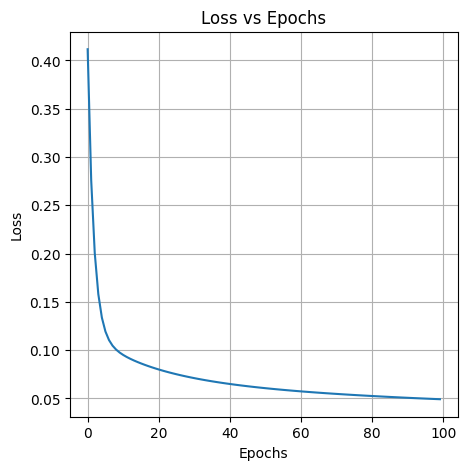

In [10]:
Non_poly_clf.plot_losses()
plt.grid()
# plt.savefig('Nonpoly_regression_loss_phi_3_lr_0.1.svg')

In [11]:
pred_Y = Non_poly_clf.predict(X_test_Non_linear_Uni)

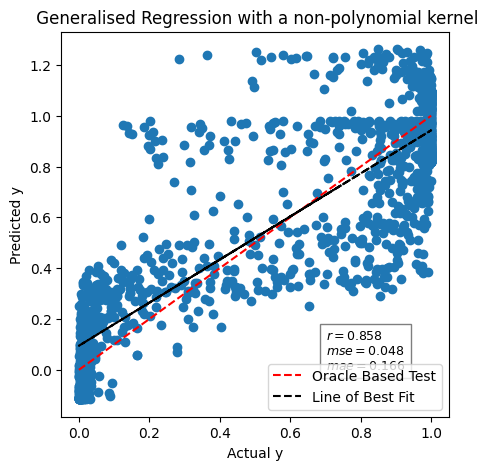

In [14]:
plt.figure (figsize = (5,5))

actual_y = Y_test_Non_linear_Uni[:,0]
pred_y = pred_Y.T[:,0]

# Fit a line to the data
coefficients = np.polyfit(actual_y, pred_y, 1)
# Generate y-values for the line
line = np.polyval(coefficients, actual_y)

r = pearson(actual_y,pred_y)
mse = MSE(actual_y,pred_y)
mae = MAE(actual_y,pred_y)
oracle_based_line_x = np.linspace(np.min(actual_y), np.max(actual_y), 1000)
oracle_based_line_y = oracle_based_line_x.copy()

plt.scatter(actual_y, pred_y)
plt.plot(oracle_based_line_x, oracle_based_line_y, 'r--', label = 'Oracle Based Test')
plt.plot(actual_y, line,color = 'k', linestyle='--',label = 'Line of Best Fit')
plt.title(f' Generalised Regression with a non-polynomial kernel')
plt.text(oracle_based_line_x[-300], oracle_based_line_y[0], f'$r = {r:0.3f}$\n$mse = {mse:0.3f}$\n$mae = {mae:0.3f}$', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.legend()

# plt.savefig('Nonpoly_regression_phi_3_correlation_plot_lr_0.05.svg')


## **Classification Task**

### **Performance Metrics**

In [19]:
# Performance Metrics

# Classification Accuracy
def accuracy(actual_y, pred_y):
    if len(pred_y.shape)>1:
        if pred_y.shape[1]>1:
            pred_y = np.argmax(pred_y,axis=1)
    return np.sum(actual_y == pred_y) / actual_y.shape[0]

# Confusion Matrix
def confusion_matrix(actual_y, pred_y):
    if len(pred_y.shape)>1:
        if pred_y.shape[1]>1:
            pred_y = np.argmax(pred_y,axis=1)

    # Get the unique labels
    unique_labels = np.unique(np.concatenate((actual_y, pred_y)))

    # Initialize the confusion matrix with zeros
    confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)))

    # Fill the confusion matrix
    for i in range(len(actual_y)):
        actual_label = actual_y[i]
        pred_label = pred_y[i]
        confusion_matrix[unique_labels == actual_label, unique_labels == pred_label] += 1

    return confusion_matrix

# Plotting Confusion Matrix
def confusion_matrix_heatmap(cm, title="Confusion Matrix"):

  # Get the number of classes
  num_classes = np.shape(cm)[0]

  # Make the cm into probability_cm
  row_sums = cm.sum(axis=1, keepdims=True)  # Calculate the row sums

  # Normalize by row sums to get probabilities
  probability_cm = cm / row_sums

  # Create the heatmap
  plt.imshow(probability_cm, cmap="Blues")  # Choose a colormap
  plt.colorbar()

  for i in range(num_classes):
    for j in range(num_classes):
        # Format the text to display two decimal places
        text = f"{probability_cm[i, j]:.2f}"
        plt.text(j, i, text, ha="center", va="center", fontsize=10, color="black", alpha = 0.6)  # Adjust fontsize and color as needed

  # Add labels and title
  plt.xticks(ticks = np.arange(num_classes), labels = np.arange(0, num_classes))
  plt.yticks(ticks = np.arange(num_classes), labels = np.arange(0, num_classes))
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.title(title)

  # Show the plot
  plt.show()

def f1_score(actual_y, pred_y):

    if len(pred_y.shape)>1:
        if pred_y.shape[1]>1:
            pred_y = np.argmax(pred_y,axis=1)

    # Check if labels are multi-class or binary classification
    if len(np.unique(actual_y)) > 2:
        # Multi-class classification: calculate F1 score for each class and average
        f1_scores = []
        for class_label in np.unique(actual_y):
            TP = np.sum((actual_y == class_label) & (pred_y == class_label))
            FP = np.sum((actual_y != class_label) & (pred_y == class_label))
            FN = np.sum((actual_y == class_label) & (pred_y != class_label))
            precision = TP / (TP + FP) if (TP + FP) > 0 else 0
            recall = TP / (TP + FN) if (TP + FN) > 0 else 0
            f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            f1_scores.append(f1_score)
        return np.mean(f1_scores)
    else:
        # Binary classification: calculate F1 score directly
        TP = np.sum((actual_y == 1) & (pred_y == 1))
        FP = np.sum((actual_y != 1) & (pred_y == 1))
        FN = np.sum((actual_y == 1) & (pred_y != 1))
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        return f1_score

def roc_curve_pair(actual_y, pred_y, class_0, class_1):
    """
    Calculates the ROC curve for a specific pair of classes in a multi-class problem.

    Args:
        actual_y: A numpy array of the actual labels.
        pred_y: A numpy array of the predicted probabilities for each class.
        class_0: The label of the first class in the pair.
        class_1: The label of the second class in the pair.

    Returns:
        A tuple of (fpr, tpr, thresholds):
            fpr: False positive rate
            tpr: True positive rate
            thresholds: Decision thresholds used to compute fpr and tpr
    """

    # Filter data for the chosen classes
    y_true = actual_y[((actual_y == class_0) | (actual_y == class_1))]
    y_score = pred_y[((actual_y == class_0) | (actual_y == class_1)), class_1]  # Probabilities for class_1

    # Get unique thresholds for ROC curve calculation
    thresholds = np.unique(np.sort(y_score))

    # Initialize fpr and tpr with 0s
    fpr = np.zeros_like(thresholds)
    tpr = np.zeros_like(thresholds)

    # Calculate TPR and FPR for each threshold
    for i, thresh in enumerate(thresholds):
        y_pred = (y_score >= thresh).astype(int)
        tp = np.sum(y_pred[y_true == class_1])
        fp = np.sum(y_pred[y_true == class_0])
        fn = np.sum((1 - y_pred)[y_true == class_1])
        tn = np.sum((1 - y_pred)[y_true == class_0])
        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)

    return fpr, tpr, thresholds

def plot_ROC(actual_y,pred_y,class_0,class_1):

    # Get ROC curve for classes 0 and 1
    fpr, tpr, thresholds = roc_curve_pair(actual_y, pred_y, class_0=class_0, class_1=class_1)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve')

    # Plot the line of no discrimination (random guessing)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Discrimination')

    # Set axis labels and title
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC between Class:{class_0} and Class:{class_1}')

    # Add legend
    plt.legend()

    # Display plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def categorical_crossentropy_loss(y_true, y_pred):
    num_samples = len(y_true)
    loss = -np.sum(np.log(y_pred[np.arange(num_samples), y_true])) / num_samples
    return loss

### **Q4 : Binary Classification**

#### **Loading Data**

In [69]:
Binary_classification_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 01/Data/binary_classification/multi_class_classification_data_group_24_train.txt'

Binary_classification_Dataset = generate_dataset(Binary_classification_path)

# Shuffle the dataset
np.random.shuffle(Binary_classification_Dataset)

In [70]:
Binary_classification_X = Binary_classification_Dataset[:,:10]
Binary_classification_y = Binary_classification_Dataset[:,-1].astype(int)

print(f'Dataset : number of samples = {Binary_classification_X.shape[0]}, number of features = {Binary_classification_X.shape[1]}')
print(f'Dataset : number of labels = {len(Binary_classification_y)}')

Dataset : number of samples = 14000, number of features = 10
Dataset : number of labels = 14000


In [93]:
# Spliting into training and testing data :

split_size = 0.8
n = Binary_classification_X.shape[0]
split_n = int(split_size * n)

# Features:
X_train_Binary = Binary_classification_X[:split_n,:].copy()
X_test_Binary = Binary_classification_X[split_n:, :].copy()

# Labels:
Y_train_Binary = np.expand_dims(Binary_classification_y[:split_n].copy(),axis=1)
Y_test_Binary = np.expand_dims(Binary_classification_y[split_n:].copy(),axis=1)

#### **Bayes Classifier (Parametric Density Estimation - Normal)**

**Calculating Parameters for Gaussian Density:**

1. **Mean**: The mean of a set of vectors $x_1, x_2, ..., x_N$ is calculated as:

$$
\text{mean} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

2. **Covariance Matrix**: The covariance matrix of a set of vectors $x_1, x_2, ..., x_N$ is calculated as:

$$
\text{covariance matrix} = \frac{1}{N} \sum_{i=1}^{N} (x_i - \text{mean})(x_i - \text{mean})^T
$$

In these expressions:
- $N$ is the number of vectors.
- $x_i$ is the i-th vector.
- $\text{mean}$ is the mean vector.
- $(x_i - \text{mean})$ is the difference between the i-th vector and the mean vector.
- $(x_i - \text{mean})^T$ is the transpose of this difference.
- The outer product of these two vectors gives a matrix, and the sum of these matrices divided by $N$ gives the covariance matrix.

The probability density function (PDF) of a multivariate Gaussian (or normal) distribution is given by:

$$
f(x | \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^k |\Sigma|}} \exp\left(-\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu)\right)
$$

Here's what each symbol represents:

- $f(x | \mu, \Sigma)$: This is the PDF of the multivariate Gaussian distribution. Given a vector $x$, and parameters $\mu$ and $\Sigma$, it gives the probability density of $x$.

- $x$: This is a vector in $\mathbb{R}^k$ (a $k$-dimensional real vector). Each element of $x$ is one variable in the multivariate distribution.

- $\mu$: This is the mean vector of the distribution. It is also a vector in $\mathbb{R}^k$. Each element of $\mu$ is the mean of the corresponding variable in $x$.

- $\Sigma$: This is the covariance matrix of the distribution. It is a $k \times k$ matrix. The element at the i-th row and j-th column of $\Sigma$ is the covariance between the $i^{th}$ and $j^{th}$ variables in $x$.


In [94]:
class BayesClassifier:
    def __init__(self):
        self.mean_0 = None
        self.cov_matrix_0 = None
        self.mean_1 = None
        self.cov_matrix_1 = None
        self.probability_y0 = None
        self.probability_y1 = None

    def gaussian_parameter(self, data):
        data = np.array(data)

        # Calculate the mean
        mean = np.mean(data, axis=0)

        # Calculate the covariance matrix
        cov_matrix = np.cov(data, rowvar=False, bias=True)

        return mean, cov_matrix

    def fit(self, X_train, y_train):
        X_given_y0 = X_train[y_train == 0]
        X_given_y1 = X_train[y_train == 1]

        self.mean_0, self.cov_matrix_0 = self.gaussian_parameter(X_given_y0)
        self.mean_1, self.cov_matrix_1 = self.gaussian_parameter(X_given_y1)

        # Calculating Priors:
        self.probability_y1 = len(X_given_y1)/(len(X_train))
        self.probability_y0 = len(X_given_y0)/(len(X_train))


    def multivariate_normal_pdf(self, X, mean, cov):
        # Dimension
        d = len(mean)

        # Subtract mean from the data point
        X_sub = X - mean

        # Exponential part
        exponent = -0.5 * (X_sub.T @ np.linalg.inv(cov) @ X_sub)

        # Constant part
        constant = 1 / (np.sqrt(2*np.pi)**d * np.linalg.det(cov)**0.5)

        # Calculate
        p = constant * np.exp(exponent)

        return p

    def bayes_classifier_normal(self, data_point):
        # for y = 0 case:
        posterior_0 = self.multivariate_normal_pdf(data_point, self.mean_0, self.cov_matrix_0) * self.probability_y0
        # for y = 1 case:
        posterior_1 = self.multivariate_normal_pdf(data_point, self.mean_1, self.cov_matrix_1) * self.probability_y1

        return np.array([posterior_0, posterior_1])

    def predict(self, X_test):
        # Calculating predicted output for test data-set
        y_predicted = np.array([self.bayes_classifier_normal(data_point) for data_point in X_test])
        return y_predicted


In [96]:
classifier = BayesClassifier()
classifier.fit(X_train_Binary, Y_train_Binary[:,0])
y_predicted = classifier.predict(X_test_Binary)

In [99]:
print(f'Classfication Accuracy : {accuracy(Y_test_Binary[:,0], y_predicted):.4f}')
print(f'F1 Score : {f1_score(Y_test_Binary[:,0], y_predicted):.4f}')

Classfication Accuracy : 0.7457
F1 Score : 0.7512


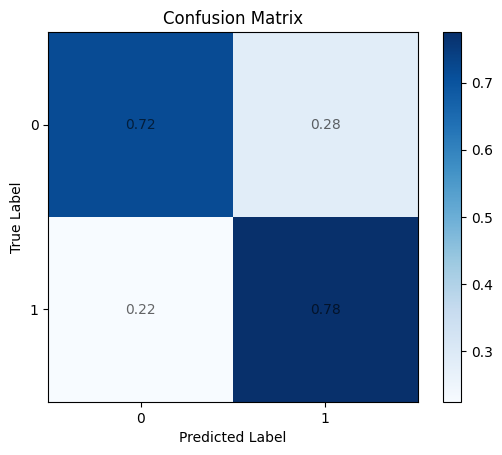

In [100]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Binary[:,0], y_predicted))

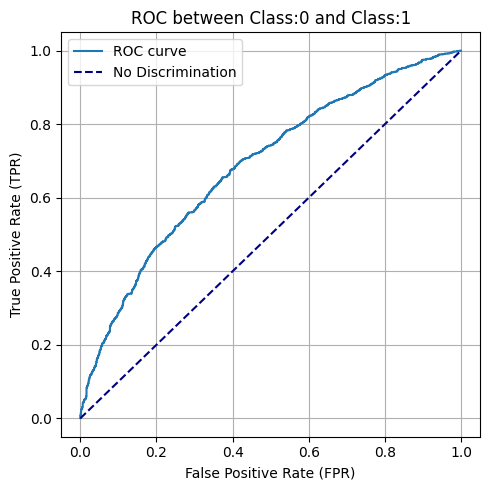

In [101]:
plot_ROC(Y_test_Binary[:,0], y_predicted,0,1)

#### **Gaussian Mixture Models**

In [227]:
class GMMClassifier:

    def __init__(self):
        # Initialize empty lists and variables to store model parameters
        self.means_list = []  # List to store cluster means for each class
        self.covs_list = []   # List to store cluster covariances for each class
        self.priors_list = [] # List to store priors for each class
        self.num_clusters = None  # Number of clusters
        self.N_Classes = None      # Number of classes
        self.priors = None         # Prior probabilities of classes

    def multivariate_normal_pdf(self,X, mean, cov):
        # Function to compute the probability density function of a multivariate normal distribution
        d = X.shape[1]  # Dimension of the data
        det_cov = np.linalg.det(cov)  # Determinant of the covariance matrix
        inv_cov = np.linalg.inv(cov)  # Inverse of the covariance matrix
        const_term = 1 / np.sqrt((2 * np.pi) ** d * det_cov)  # Constant term in the PDF formula
        exponent_term = np.exp(-0.5 * np.sum(np.dot((X - mean), inv_cov) * (X - mean), axis=1))  # Exponent term in the PDF formula
        return const_term * exponent_term  # Return the computed probabilities

    def EM_algorithm(self,X, num_clusters, max_iters=100, tol=1e-6):
        # Function to perform the Expectation-Maximization algorithm for Gaussian Mixture Models
        n_samples, n_features = X.shape  # Number of samples and number of features

        # Initialize parameters
        np.random.seed(0)  # Set random seed for reproducibility
        mean = X[np.random.choice(n_samples, num_clusters, replace=False)]  # Initialize cluster means randomly
        cov = np.array([np.eye(n_features) for _ in range(num_clusters)])  # Initialize cluster covariances as identity matrices
        pi = np.ones(num_clusters) / num_clusters  # Initialize mixing coefficients

        for _ in range(max_iters):
            # E-step: Compute responsibilities (likelihoods) of each data point belonging to each cluster
            gamma = np.zeros((n_samples, num_clusters))  # Initialize responsibilities matrix
            for k in range(num_clusters):
                gamma[:, k] = pi[k] * self.multivariate_normal_pdf(X, mean[k], cov[k])  # Compute likelihoods
            gamma /= np.sum(gamma, axis=1, keepdims=True)  # Normalize responsibilities

            # M-step: Update parameters based on responsibilities
            prev_mean = mean.copy()  # Save previous mean
            prev_cov = cov.copy()    # Save previous covariance
            prev_pi = pi.copy()      # Save previous mixing coefficients

            Nk = np.sum(gamma, axis=0)  # Compute effective number of points assigned to each cluster
            mean = np.dot(gamma.T, X) / Nk[:, None]  # Update mean
            for k in range(num_clusters):
                cov[k] = np.dot((X - mean[k]).T, np.dot(np.diag(gamma[:, k]), X - mean[k])) / Nk[k]  # Update covariance
            pi = Nk / n_samples  # Update mixing coefficients

            # Check convergence
            mean_change = np.max(np.abs(mean - prev_mean))  # Calculate change in mean
            cov_change = np.max(np.abs(cov - prev_cov))      # Calculate change in covariance
            pi_change = np.max(np.abs(pi - prev_pi))         # Calculate change in mixing coefficients
            if mean_change < tol and cov_change < tol and pi_change < tol:
                break  # If changes are below tolerance, break the loop

        return mean, cov, pi  # Return converged mean, covariance, and mixing coefficients

    def find_parameters(self, X_train, Y_train):
        # Function to find GMM parameters for each class
        means_list = []
        covs_list = []
        priors_list = []

        print('Finding Mixture Models!')
        for label in range(self.N_Classes):
            data = X_train[Y_train[:,0]==label]  # Filter data for the current class
            means, covs, priors = self.EM_algorithm(data, self.num_clusters)  # Perform EM algorithm
            means_list.append(means)
            covs_list.append(covs)
            priors_list.append(priors)
            print(f'Class : {label} done!')

        self.means_list = np.array(means_list)   # Store computed means
        self.covs_list = np.array(covs_list)     # Store computed covariances
        self.priors_list = np.array(priors_list) # Store computed priors

    def calculate_priors(self, Y_train):
        # Calculate prior probabilities of classes
        self.N_Classes = len(np.unique(Y_train))  # Determine number of classes
        self.priors = np.zeros(self.N_Classes)    # Initialize array to store priors

        print('Priors')
        for label in range(self.N_Classes):
            # Count occurrences of each class and divide by total samples
            self.priors[label] = np.sum(Y_train == label) / len(Y_train)
            print(f"Probability of class {label} : {self.priors[label]}")

        print(f"Total Probability : {np.sum(self.priors)}")

    def multivariate_gaussian_pdf(self,x, mean, cov):
        # Compute the probability density function of a multivariate Gaussian distribution
        n = len(mean)
        det_cov = np.linalg.det(cov)
        inv_cov = np.linalg.inv(cov)
        constant = 1.0 / np.sqrt((2*np.pi)**n * det_cov)
        exponent = -0.5 * (x - mean).T @ inv_cov @(x - mean)
        return constant * np.exp(exponent)

    def ccd(self,x,means,covs,priors):
        # Compute the conditional class distribution
        p = 0
        for mean, cov, prior in zip(means, covs, priors):
            p += self.multivariate_gaussian_pdf(x, mean, cov) * prior

        return p

    def fit(self,X_train,Y_train,num_clusters):
        # Fit the model to the training data
        self.num_clusters = num_clusters
        self.calculate_priors(Y_train)     # Calculate prior probabilities
        self.find_parameters(X_train,Y_train)  # Find GMM parameters for each class

    def predict(self,X_test):
        # Predict the class labels for the test data
        pred_y = []
        for data_point in X_test:
            posteriors = []
            for i, (means, covs, alpha) in enumerate(zip(self.means_list, self.covs_list, self.priors_list)):
                posteriors.append(self.ccd(data_point, means, covs, alpha) * self.priors[i])
            predicted_class = posteriors
            pred_y.append(predicted_class)
        pred_y = np.array(pred_y)
        return pred_y


In [246]:
BinaryGMM_clf = GMMClassifier()
BinaryGMM_clf.fit(X_train_Binary,Y_train_Binary,num_clusters = 7)

Priors
Probability of class 0 : 0.5008928571428571
Probability of class 1 : 0.49910714285714286
Total Probability : 1.0
Finding Mixture Models!
Class : 0 done!
Class : 1 done!


In [247]:
pred_y = BinaryGMM_clf.predict(X_test_Binary)

In [248]:
print(f'Accuracy using GMM , Num_of_Gaussians = {3}')
print(f'Classfication Accuracy : {accuracy(Y_test_Binary[:,0], pred_y):.4f}')
print(f'F1 Score : {f1_score(Y_test_Binary[:,0], pred_y):.4f}')

Accuracy using GMM , Num_of_Gaussians = 3
Classfication Accuracy : 0.8014
F1 Score : 0.7993


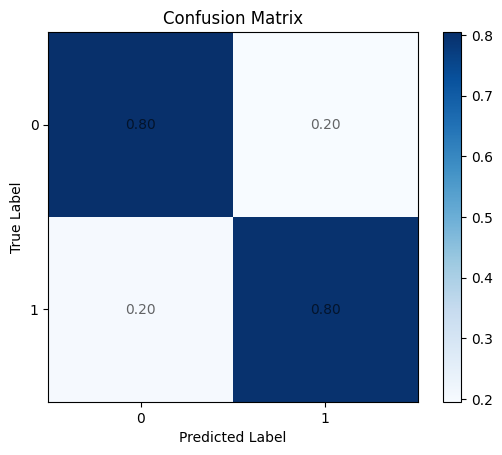

In [249]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Binary[:,0], pred_y))

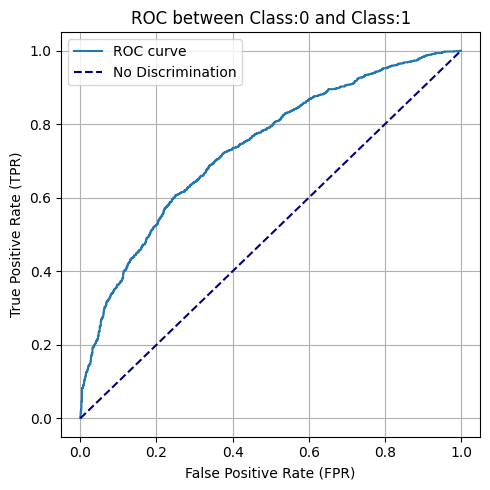

In [250]:
plot_ROC(Y_test_Binary[:,0],pred_y, 0, 1)

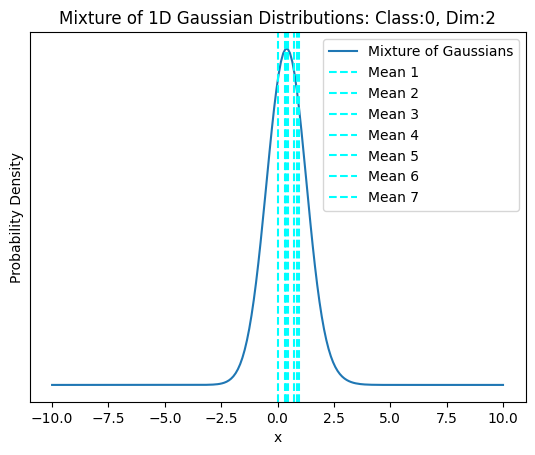

In [251]:
# Code to plot the marginal pdf of GMM

means_list = BinaryGMM_clf.means_list
covs_list = BinaryGMM_clf.covs_list
priors_list = BinaryGMM_clf.priors_list


def marginal_distribution(means, covariances):

    gaussians = np.shape(means)[0]
    dim = np.shape(means)[1]
    marginal_distribution = np.zeros((gaussians, dim, 2))
    for i, mean in enumerate(means):
        # each mean vector should be 25 dimensional
        cov = covariances[i, :, :]
        variances = np.sum(cov, axis = 0)
        for j, value in enumerate(mean):
            mean_each_dimension = value
            var_each_dimension = variances[j]
            param = np.array([mean_each_dimension, var_each_dimension])
            marginal_distribution[i][j] = param

    return marginal_distribution

# Function to plot the gaussian mixture model in 1D
def plot_gaussian_mixture(means, variances, x_min=-10, x_max=10, num_points=200):

  x = np.linspace(x_min, x_max, num_points)
  y_total = np.zeros(len(x))
  i = 0

  for mean, variance in zip(means, variances):
    sigma = np.sqrt(variance)  # Standard deviation
    y = np.exp(-(x - mean) ** 2 / (2 * sigma ** 2)) / (np.sqrt(2 * np.pi) * sigma)
    y_total += y*priors[i]  # Add PDF of each component to the total
    i += 1

  y_total = y_total/np.sum(y_total)
  return x, y_total


class_  = 0
dim = 2

means = means_list[class_,:,:]
covariances = covs_list[class_,:,:,:]
priors = priors_list[class_,:]

marginal_pdf = marginal_distribution(means, covariances)
mean = marginal_pdf[:, dim, 0]
variance = marginal_pdf[:, dim, 1]

x, y_total = plot_gaussian_mixture(mean, variance, -10, 10, 200)

# Plot the mixture of Gaussians
plt.plot(x, y_total, label="Mixture of Gaussians")

# Mark the means with vertical lines and labels
for i, m in enumerate(mean):
    plt.axvline(m, color='cyan', linestyle='dashed', label=f"Mean {i+1}")

# Customize the plot
plt.xlabel("x")
plt.yticks([], [])
plt.ylabel("Probability Density")
plt.title(f"Mixture of 1D Gaussian Distributions: Class:{class_}, Dim:{dim}")
plt.legend()
plt.show()

#### **Non Parametric Denisty Estiamation (Parzen Window)**

In [137]:
class Parzen_window():
  def __init__(self, X_train, y_train, window_size):
    # Split data into classes:
    self.class_1 = X_train[y_train == 1]
    self.class_0 = X_train[y_train == 0]

    self.no_train_points = X_train.shape[0]
    self.dim = X_train.shape[1]
    self.win_size = window_size

  # Define the kernels:
  def gaussian_kernel(self, x1, x2):
    u = np.linalg.norm((x1 - x2)/self.win_size)
    return np.exp(-(u**2)/2) / (np.sqrt(2*np.pi))**self.dim

  def uniform_kernel(self, x1, x2):
    u = np.linalg.norm((x1 - x2)/self.win_size)
    if np.abs(u) <= 0.5:
      return 1
    else:
      return 0

  def epanechnikov_kernel(self, x1, x2):
    u = np.linalg.norm((x1 - x2)/self.win_size)
    if np.abs(u) <= 1:
      return 0.75 * (1 - u**2)
    else:
      return 0

  # Predicting test labels:
  def predict(self, X_test, kernel):
    y_predicted = []
    for test_point in X_test:
      if kernel == 'gaussian':
        # Class 0:
        k_0 = sum(self.gaussian_kernel(point, test_point) for point in self.class_0)
        # Class 1:
        k_1 = sum(self.gaussian_kernel(point, test_point) for point in self.class_1)
      elif kernel == 'uniform':
        # Class 0:
        k_0 = sum(self.uniform_kernel(point, test_point) for point in self.class_0)
        # Class 1:
        k_1 = sum(self.uniform_kernel(point, test_point) for point in self.class_1)
      elif kernel == 'epanechnikov':
        # Class 0:
        k_0 = sum(self.epanechnikov_kernel(point, test_point) for point in self.class_0)
        # Class 1:
        k_1 = sum(self.epanechnikov_kernel(point, test_point) for point in self.class_1)
      y_predicted.append([k_0/(k_0+k_1),k_1/(k_0+k_1)])
    return np.array(y_predicted)


In [159]:
# Reshaping
y_train_parzen = Y_train_Binary.reshape(-1)
y_test_parzen = Y_test_Binary.reshape(-1)[:1000]

window_size = 9
parzen = Parzen_window(X_train_Binary, y_train_parzen, window_size)

In [160]:
y_predicted_gaussian = parzen.predict(X_test_Binary[:1000],'gaussian')

In [161]:
y_predicted_uniform = parzen.predict(X_test_Binary[:1000],'uniform')

In [162]:
y_predicted_epanechnikov = parzen.predict(X_test_Binary[:1000],'epanechnikov')

In [163]:
print(f"Accuracy for gaussian kernel is: {accuracy(y_test_parzen, y_predicted_gaussian)}")
print(f"F-1 score for gaussian kernel is: {f1_score(y_test_parzen, y_predicted_gaussian)}")

Accuracy for gaussian kernel is: 0.679
F-1 score for gaussian kernel is: 0.7068493150684931


In [164]:
print(f"Accuracy for uniform kernel is: {accuracy(y_test_parzen, y_predicted_uniform)}")
print(f"F-1 score for uniform kernel is: {f1_score(y_test_parzen, y_predicted_uniform)}")

Accuracy for uniform kernel is: 0.64
F-1 score for uniform kernel is: 0.6979865771812079


In [165]:
print(f"Accuracy for epanechnikov kernel is: {accuracy(y_test_parzen, y_predicted_epanechnikov)}")
print(f"F-1 score for epanechnikov kernel is: {f1_score(y_test_parzen, y_predicted_epanechnikov)}")

Accuracy for epanechnikov kernel is: 0.668
F-1 score for epanechnikov kernel is: 0.7167235494880546


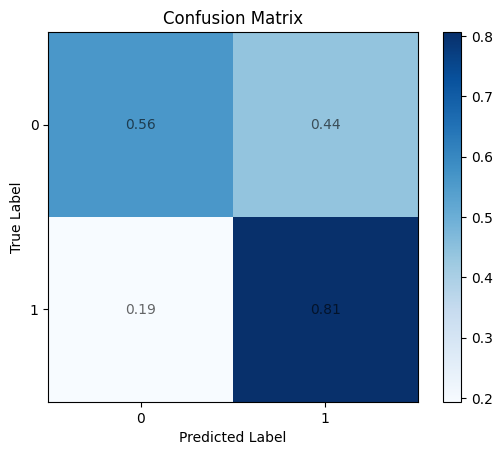

In [166]:
confusion_matrix_heatmap(confusion_matrix(y_test_parzen, y_predicted_gaussian), title="Confusion Matrix")

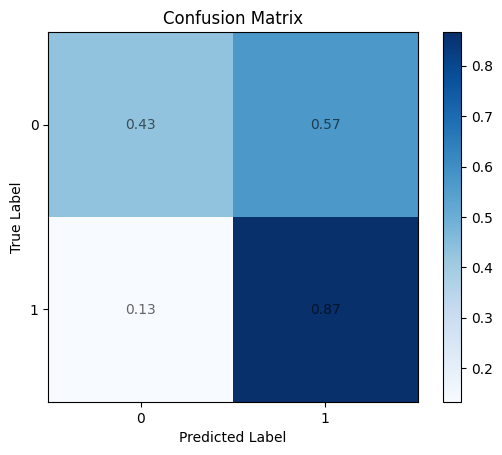

In [167]:
confusion_matrix_heatmap(confusion_matrix(y_test_parzen, y_predicted_uniform), title="Confusion Matrix")

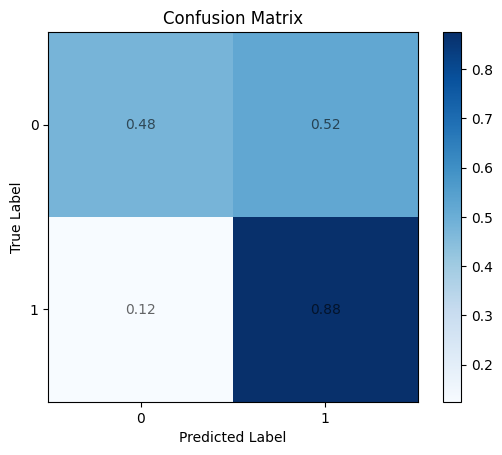

In [168]:
confusion_matrix_heatmap(confusion_matrix(y_test_parzen, y_predicted_epanechnikov), title="Confusion Matrix")

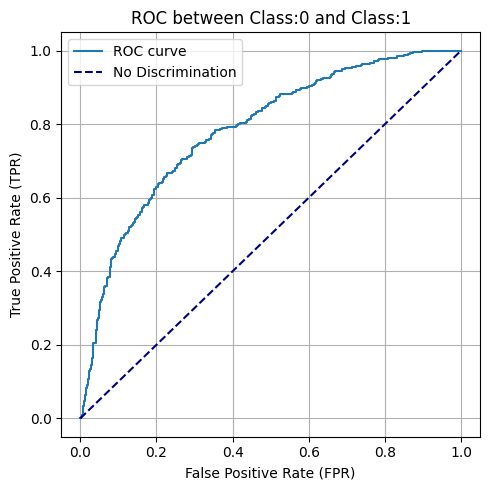

In [169]:
plot_ROC(y_test_parzen,  y_predicted_gaussian, 0, 1)

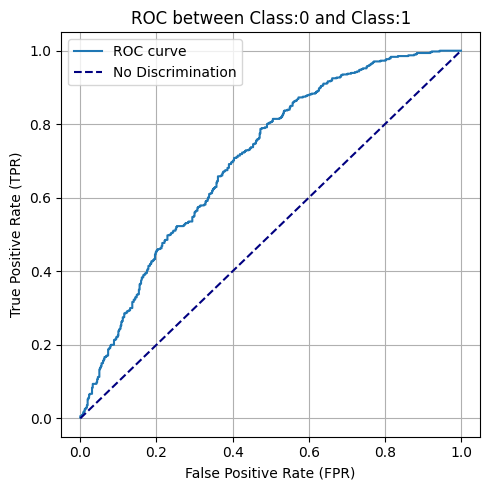

In [170]:
plot_ROC(y_test_parzen, y_predicted_uniform, 0, 1)

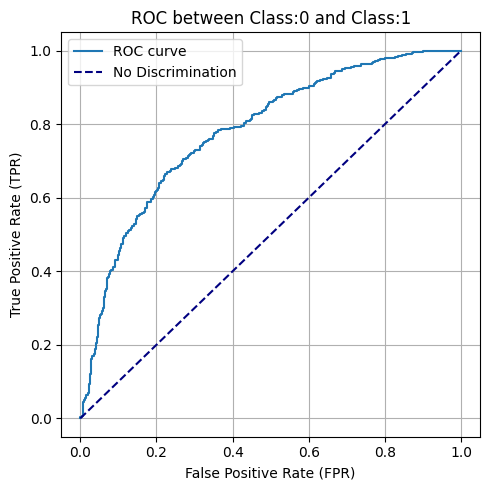

In [171]:
plot_ROC(y_test_parzen, y_predicted_epanechnikov, 0, 1)

#### **K-Nearest Neighbor**

In [126]:
class KNN:
  def __init__(self, k, distance_metric='euclidean'):
    self.k = k
    self.distance_metric = distance_metric

  def euclidean_distance(self, x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

  def cosine_distance(self, x1, x2):
    return 1 - (np.sum(x1*x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)))

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def single_pt_prediction(self, data_point):
    if self.distance_metric == 'euclidean':
      distance = [self.euclidean_distance(data_point, train_point) for train_point in self.X_train]
    elif self.distance_metric == 'cosine':
      distance = [self.cosine_distance(data_point, train_point) for train_point in self.X_train]

    knn_index = np.argsort(distance)[:self.k]
    labels = np.array([self.y_train[i] for i in knn_index]).astype(int)

    # if np.count_nonzero(labels == 1) >= np.count_nonzero(labels == 0):
    #   return 1
    # else:
    #   return 0
    class_1 = np.count_nonzero(labels == 1)
    class_0 = np.count_nonzero(labels == 0)
    # print(class_0)
    # print(class_1)
    total = class_0 + class_1

    return np.array([class_0/total,class_1/total])

  def predict(self, X_test):
    return np.array([self.single_pt_prediction(test_point) for test_point in X_test])


In [127]:
k_value = 19

knn_euclidean = KNN(k=k_value, distance_metric='euclidean')
knn_cosine = KNN(k=k_value, distance_metric='cosine')

knn_euclidean.fit(X_train_Binary,Y_train_Binary[:,0])
knn_cosine.fit(X_train_Binary,Y_train_Binary[:,0])

y_predicted_euclidean = knn_euclidean.predict(X_test_Binary[:1000])
y_predicted_cosine = knn_cosine.predict(X_test_Binary[:1000])

In [128]:
print(f"Accuracy for euclidean distance metric: {accuracy(Y_test_Binary[:1000,0],np.array(y_predicted_euclidean))}")
print(f"Accuracy for cosine distance metric: {accuracy(Y_test_Binary[:1000,0],np.array(y_predicted_cosine))}")

Accuracy for euclidean distance metric: 0.74
Accuracy for cosine distance metric: 0.75


In [129]:
print(f"f1_score for euclidean distance metric: {f1_score(Y_test_Binary[:1000,0],np.array(y_predicted_euclidean))}")
print(f"f1_score for cosine distance metric: {f1_score(Y_test_Binary[:1000,0],np.array(y_predicted_cosine))}")


f1_score for euclidean distance metric: 0.7470817120622568
f1_score for cosine distance metric: 0.7489959839357428


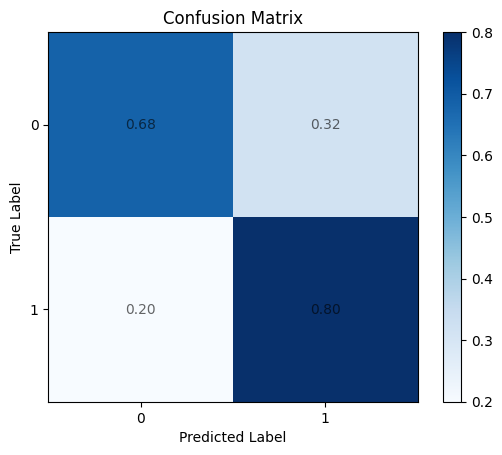

In [130]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Binary[:1000,0],np.array(y_predicted_euclidean)))

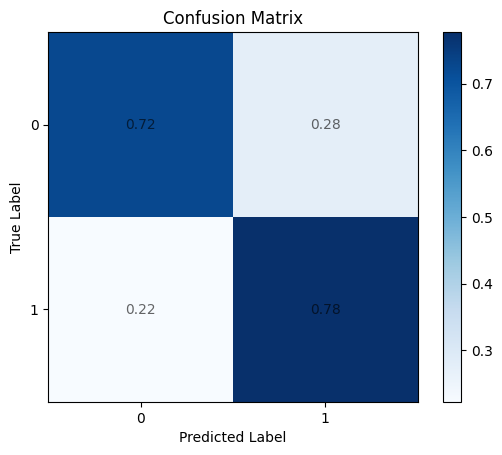

In [131]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Binary[:1000,0],np.array(y_predicted_cosine)))

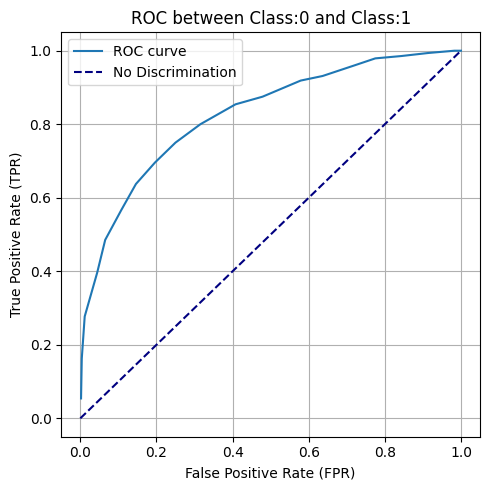

In [132]:
plot_ROC(Y_test_Binary[:1000,0], np.array(y_predicted_euclidean),0,1)

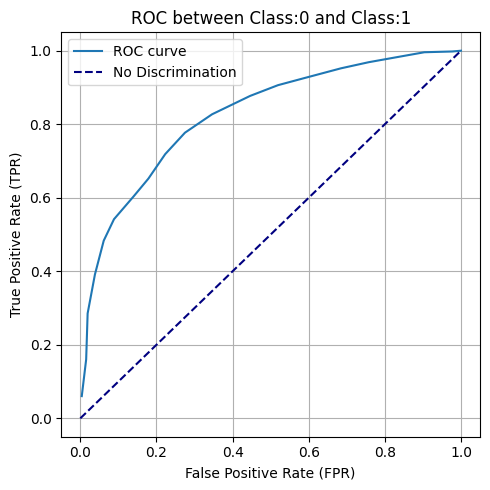

In [133]:
plot_ROC(Y_test_Binary[:1000,0], np.array(y_predicted_cosine),0,1)

#### **Linear Classifier**

In [173]:
class Logistic_Regression_Binary:
  def __init__(self):
    self.coef = None  # Initialize the coefficients

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))  # Sigmoid function for logistic regression

  def single_fit(self,X_train,Y_train,label,learning_rate=0.1, threshold=1e-6):
    self.no_of_points =  X_train.shape[0]  # Number of training points
    self.no_of_features = X_train.shape[1]  # Number of features

    X_train = np.insert(X_train, self.no_of_features, 1, axis=1)  # Add bias term

    # Initialize W with random values
    np.random.seed(0)
    W = np.random.rand(self.no_of_features + 1) * np.sqrt(1./(self.no_of_features + 1))
    W = W.reshape(-1,1)
    no_of_iterations = 201

    cost_list = []  # To store the cost function value at each iteration
    for _ in range(no_of_iterations):
      Y_hat = self.sigmoid(X_train @ W)  # Predicted values
      Y_hat = Y_hat.reshape(-1,1)

      # Cost function for logistic regression
      cost = -(1/self.no_of_points) * np.sum(Y_train * np.log(Y_hat) + (1 - Y_train) * np.log((1 - Y_hat)))

      # Gradient of the cost function
      gradient = (1/self.no_of_points)*(X_train.T @ (Y_hat - Y_train))
      gradient = gradient.reshape(-1,1)

      W = W - learning_rate*gradient  # Update rule for gradient descent
      cost_list.append(cost)  # Append the cost to the list

      if (_%50 == 0):
        print( f"Class {label}: Iterations{_} , Cost = {cost}")

    return W  # Return the learned weights

  def fit(self,X_train,Y_train):
    classes = np.unique(Y_train)  # Unique classes in the target variable
    W_matrix = []  # To store the weights for each class
    for i,label in enumerate(classes):
      temp_binary = (Y_train.copy() == classes[i]).astype(int)  # Binary target variable for the current class
      W_matrix.append(self.single_fit(X_train,temp_binary,label))  # Learn the weights for the current class
    W_matrix = np.array(W_matrix)
    W_matrix = np.squeeze(W_matrix, axis=2)
    self.coef = W_matrix  # Store the learned weights

  def predict(self,X_test):
    X_test = np.insert(X_test, self.no_of_features, 1, axis=1)  # Add bias term
    probabilities = []  # To store the predicted probabilities for each class
    for w in self.coef:
        w = w.reshape(-1,1)
        Z = np.dot(X_test, w)  # Linear combination of weights and features
        Z = Z.reshape(-1,1)
        prob = self.sigmoid(Z)  # Apply sigmoid to get probabilities
        probabilities.append(prob)
    probabilities = np.array(probabilities)
    probabilities = np.squeeze(probabilities, axis=2)
    return probabilities.T  # Return the predicted probabilities


In [174]:
y_train_lr = np.array(Y_train_Binary)
y_test_lr = np.array(Y_test_Binary)

lr_over = Logistic_Regression_Binary()
lr_over.fit(X_train_Binary,y_train_lr)

y_predicted = lr_over.predict(X_test_Binary)

Class 0: Iterations0 , Cost = 0.8707341584116326
Class 0: Iterations50 , Cost = 0.592039972901611
Class 0: Iterations100 , Cost = 0.5683791845184056
Class 0: Iterations150 , Cost = 0.5603982453428508
Class 0: Iterations200 , Cost = 0.5570357122213351
Class 1: Iterations0 , Cost = 0.8306888472460167
Class 1: Iterations50 , Cost = 0.5971218480376933
Class 1: Iterations100 , Cost = 0.5718099441796749
Class 1: Iterations150 , Cost = 0.5624733393169032
Class 1: Iterations200 , Cost = 0.5582599005184128


In [178]:
y_predicted_train_data = lr_over.predict(X_train_Binary)
print(f"Empirical risk corresponding to train dataset is {categorical_crossentropy_loss(Y_train_Binary[:,0], y_predicted_train_data)}")
print(f"Empirical risk corresponding to test dataset is {categorical_crossentropy_loss(Y_test_Binary[:,0], y_predicted)}")

Empirical risk corresponding to train dataset is 0.5593109175442293
Empirical risk corresponding to test dataset is 0.5536080341507277


In [180]:
print(f"Accuracy is : {accuracy(y_test_lr[:,0], y_predicted)}")
print(f"F-1 score is : {f1_score(y_test_lr[:,0], y_predicted)}")

Accuracy is : 0.7207142857142858
F-1 score is : 0.7223011363636365


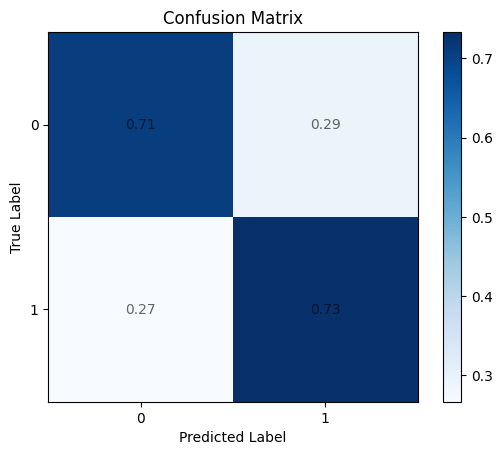

In [181]:
confusion_matrix_heatmap(confusion_matrix(y_test_lr[:,0], y_predicted), title="Confusion Matrix")

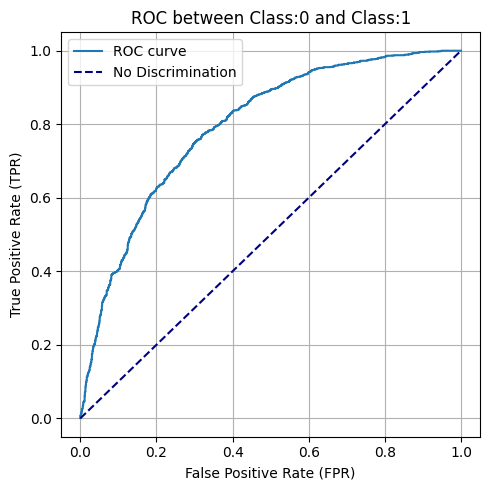

In [182]:
plot_ROC(y_test_lr[:,0], y_predicted,0,1) # Not using y_test_lr here (edsr)

### **Q5 : Multi class Classification problem (10 Classes)**

#### **Loading Data**

In [274]:
# Create Dataset (Example Usage)

Classification_Multiclass_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 01/Data/multi_class_classification/multi_class_classification_data_group_24_train.txt'

Classification_Multiclass_Dataset = generate_dataset(Classification_Multiclass_path)

In [275]:
n_features = 25 # Given

Classification_Multiclass_X = Classification_Multiclass_Dataset[:,:n_features]
Classification_Multiclass_y = Classification_Multiclass_Dataset[:,n_features:]
N_Classes = np.unique(Classification_Multiclass_y).shape[0]

print(f'Dataset : number of samples = {Classification_Multiclass_X.shape[0]}, number of features = {Classification_Multiclass_X.shape[1]}')
print(f'Dataset : number of samples = {Classification_Multiclass_y.shape[0]}, Number of Classes = {N_Classes}')

Dataset : number of samples = 70000, number of features = 25
Dataset : number of samples = 70000, Number of Classes = 10


In [276]:
# Splitting the Dataset

split_size = 0.8
n = Classification_Multiclass_X.shape[0]
split_n = int(split_size * n)

X_train_Multiclass = Classification_Multiclass_X[:split_n,:].copy()
Y_train_Multiclass = Classification_Multiclass_y[:split_n,:].copy()

X_test_Multiclass = Classification_Multiclass_X[split_n:, :].copy()
Y_test_Multiclass = Classification_Multiclass_y[split_n:, :].copy()

#### **Bayes Classifer (Parametric Density Estimation - Normal)**

**Calculating Parameters for Gaussian Density:**

1. **Mean**: The mean of a set of vectors $x_1, x_2, ..., x_N$ is calculated as:

$$
\text{mean} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

2. **Covariance Matrix**: The covariance matrix of a set of vectors $x_1, x_2, ..., x_N$ is calculated as:

$$
\text{covariance matrix} = \frac{1}{N} \sum_{i=1}^{N} (x_i - \text{mean})(x_i - \text{mean})^T
$$

In these expressions:
- $N$ is the number of vectors.
- $x_i$ is the i-th vector.
- $\text{mean}$ is the mean vector.
- $(x_i - \text{mean})$ is the difference between the i-th vector and the mean vector.
- $(x_i - \text{mean})^T$ is the transpose of this difference.
- The outer product of these two vectors gives a matrix, and the sum of these matrices divided by $N$ gives the covariance matrix.


The probability density function (PDF) of a multivariate Gaussian (or normal) distribution is given by:

$$
f(x | \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^k |\Sigma|}} \exp\left(-\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu)\right)
$$

Here's what each symbol represents:

- $f(x | \mu, \Sigma)$: This is the PDF of the multivariate Gaussian distribution. Given a vector $x$, and parameters $\mu$ and $\Sigma$, it gives the probability density of $x$.

- $x$: This is a vector in $\mathbb{R}^k$ (a $k$-dimensional real vector). Each element of $x$ is one variable in the multivariate distribution.

- $\mu$: This is the mean vector of the distribution. It is also a vector in $\mathbb{R}^k$. Each element of $\mu$ is the mean of the corresponding variable in $x$.

- $\Sigma$: This is the covariance matrix of the distribution. It is a $k \times k$ matrix. The element at the i-th row and j-th column of $\Sigma$ is the covariance between the $i^{th}$ and $j^{th}$ variables in $x$.


In [ ]:
class BayesClassifier:

    def __init__(self):
        self.means = []          # List to store class means
        self.cov_matrices = []  # List to store class covariance matrices
        self.priors = None      # Prior probabilities of classes
        self.N_Classes = None   # Number of unique classes

    def calculate_priors(self, Y_train):
        # Calculate prior probabilities of classes
        self.N_Classes = len(np.unique(Y_train))
        self.priors = np.zeros(self.N_Classes)

        print('Priors')
        for label in range(self.N_Classes):
            # Count occurrences of each class and divide by total samples
            self.priors[label] = np.sum(Y_train == label) / len(Y_train)
            print(f"Probability of class {label} : {self.priors[label]}")

        print(f"Total Probability : {np.sum(self.priors)}")

    def gaussian_parameter(self, data):
        # Function for estimating Gaussian Parameters
        data = np.array(data)
        # Calculate the mean
        mean = np.mean(data, axis=0)
        # Calculate the covariance matrix
        cov_matrix = np.cov(data, rowvar=False, bias=True)
        return mean, cov_matrix

    def find_parameters(self, X_train, Y_train):
        # Estimate Gaussian parameters for each class
        for label in range(self.N_Classes):
            mean, cov_matrix = self.gaussian_parameter(X_train[Y_train[:,0] == label])
            self.means.append(mean)
            self.cov_matrices.append(cov_matrix)

        self.means = np.array(self.means)
        self.cov_matrices = np.array(self.cov_matrices)

    def multivariate_normal_pdf(self, X, mean, cov):
        # Dimension
        d = len(mean)
        # Subtract mean from the data point
        X_sub = X - mean
        # Exponential part
        exponent = -0.5 * (X_sub.T @ np.linalg.inv(cov) @ X_sub)
        # Constant part
        constant = 1 / (np.sqrt(2*np.pi)**d * np.linalg.det(cov)**0.5)
        # Calculate probability density
        p = constant * np.exp(exponent)
        return p

    def max_posterior_gaussian(self, X):
        posterior = []
        # Calculate posterior probabilities for each class
        for label in range(self.N_Classes):
            posterior.append(self.multivariate_normal_pdf(X, self.means[label], self.cov_matrices[label]) * self.priors[label])

        return posterior

    def fit(self, X_train, Y_train):
        # Train the classifier
        self.calculate_priors(Y_train)
        self.find_parameters(X_train, Y_train)

    def predict(self, X_test):
        y_pred = []
        # Predict class labels for test data
        for data_point in X_test:
            y_pred.append(self.max_posterior_gaussian(data_point))

        y_pred = np.array(y_pred)
        return y_pred


In [ ]:
MultiBayesClf = BayesClassifier()
MultiBayesClf.fit(X_train_Multiclass,Y_train_Multiclass)

Probability of class 0 : 0.09928571428571428
Probability of class 1 : 0.09933928571428571
Probability of class 2 : 0.10016071428571428
Probability of class 3 : 0.10173214285714285
Probability of class 4 : 0.10073214285714285
Probability of class 5 : 0.09951785714285714
Probability of class 6 : 0.09994642857142857
Probability of class 7 : 0.0995
Probability of class 8 : 0.09935714285714285
Probability of class 9 : 0.10042857142857142
Total Probability : 1.0


In [ ]:
y_pred = MultiBayesClf.predict(X_test_Multiclass)

In [ ]:
print(f'Classfication Accuracy : {accuracy(Y_test_Multiclass[:,0], y_pred):.4f}')
print(f'F1 Score : {f1_score(Y_test_Multiclass[:,0], y_pred):.4f}')

Classfication Accuracy : 0.4981
F1 Score : 0.4950


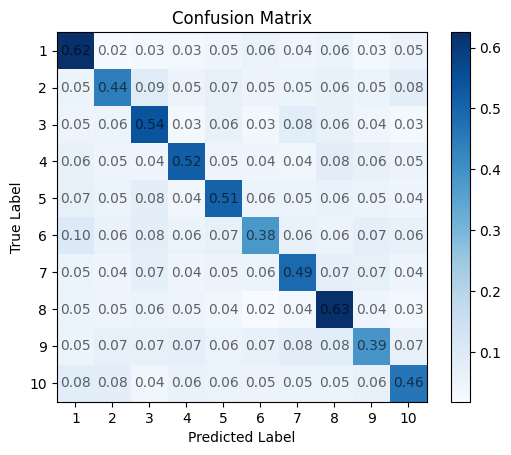

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:,0], y_pred))

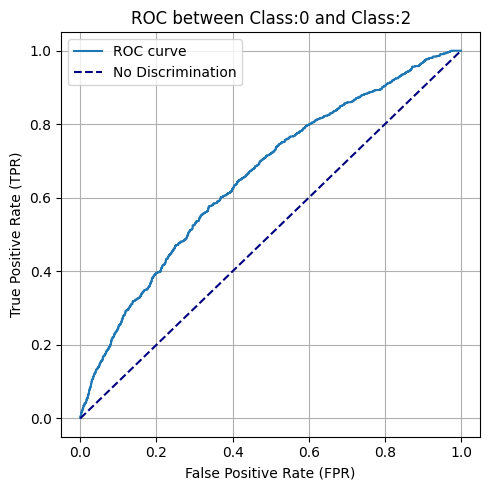

In [ ]:
plot_ROC(Y_test_Multiclass[:,0], y_pred, 0, 2)

#### **Non Parametric Density Estimation (Parzen Window)**

In [277]:
class Parzen_window():
  def __init__(self, X_train, y_train, window_size):
    self.classes = np.unique(y_train)
    self.class_data = {c: X_train[y_train == c] for c in self.classes}

    self.no_train_points = X_train.shape[0]
    self.dim = X_train.shape[1]
    self.win_size = window_size

  # Define the kernels:
  def gaussian_kernel(self, x1, x2):
    u = np.linalg.norm((x1 - x2)/self.win_size)
    return np.exp(-(u**2)/2) / (np.sqrt(2*np.pi))**self.dim

  def uniform_kernel(self, x1, x2):
    u = np.linalg.norm((x1 - x2)/self.win_size)
    if np.abs(u) <= 0.5:
      return 1
    else:
      return 0

  def epanechnikov_kernel(self, x1, x2):
    u = np.linalg.norm((x1 - x2)/self.win_size)
    if np.abs(u) <= 1:
      return 0.75 * (1 - u**2)
    else:
      return 0

  # Predicting test labels:
  def predict(self, X_test, kernel):
    y_predicted = []
    for test_point in X_test:
      k = {}
      for c in self.classes:
        if kernel == 'gaussian':
          k[c] = sum(self.gaussian_kernel(point, test_point) for point in self.class_data[c])
        elif kernel == 'uniform':
          k[c] = sum(self.uniform_kernel(point, test_point) for point in self.class_data[c])
        elif kernel == 'epanechnikov':
          k[c] = sum(self.epanechnikov_kernel(point, test_point) for point in self.class_data[c])
      scores = list(k.values())
      probabilities = scores/np.sum(scores)
      y_predicted.append(probabilities)
    return np.array(y_predicted)

In [294]:
window_size = 0.8
parzen = Parzen_window(X_train_Multiclass, Y_train_Multiclass[:,0], window_size)

In [295]:
y_predicted_gaussian = parzen.predict(X_test_Multiclass[:500],'gaussian')

In [296]:
window_size = 10
parzen = Parzen_window(X_train_Multiclass, Y_train_Multiclass[:,0], window_size)

In [297]:
y_predicted_uniform = parzen.predict(X_test_Multiclass[:500],'uniform')
y_predicted_epanechnikov = parzen.predict(X_test_Multiclass[:500],'epanechnikov')

In [298]:
print(f'Gaussian Window - Classfication Accuracy : {accuracy(Y_test_Multiclass[:500,0], y_predicted_gaussian)}')
print(f'Uniform Window - Classfication Accuracy : {accuracy(Y_test_Multiclass[:500,0], y_predicted_uniform)}')
print(f'Epanechnikov Window - Classfication Accuracy : {accuracy(Y_test_Multiclass[:500,0], y_predicted_epanechnikov)}')

Gaussian Window - Classfication Accuracy : 0.502
Uniform Window - Classfication Accuracy : 0.244
Epanechnikov Window - Classfication Accuracy : 0.228


In [299]:
print(f'Gaussian Window - F1 Score : {f1_score(Y_test_Multiclass[:500,0], y_predicted_gaussian)}')
print(f'Uniform Window - F1 Score : {f1_score(Y_test_Multiclass[:500,0], y_predicted_uniform)}')
print(f'Epanechnikov Window - F1 Score : {f1_score(Y_test_Multiclass[:500,0], y_predicted_epanechnikov)}')

Gaussian Window - F1 Score : 0.49512063384570676
Uniform Window - F1 Score : 0.21595279483141122
Epanechnikov Window - F1 Score : 0.17801666493294108


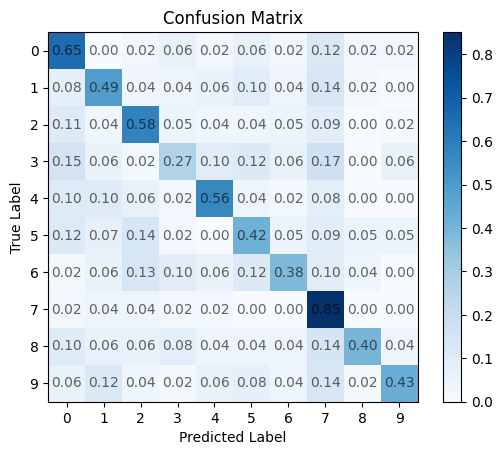

In [300]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:500,0], y_predicted_gaussian))

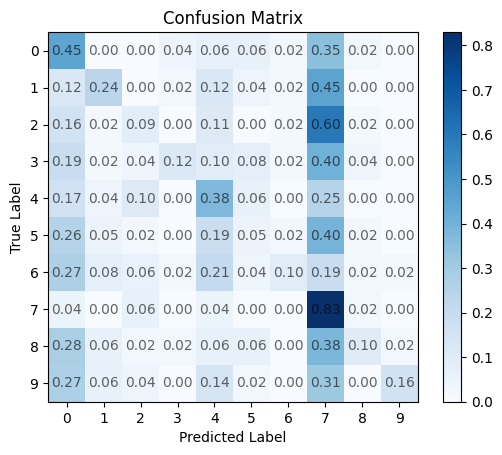

In [301]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:500,0], y_predicted_uniform))

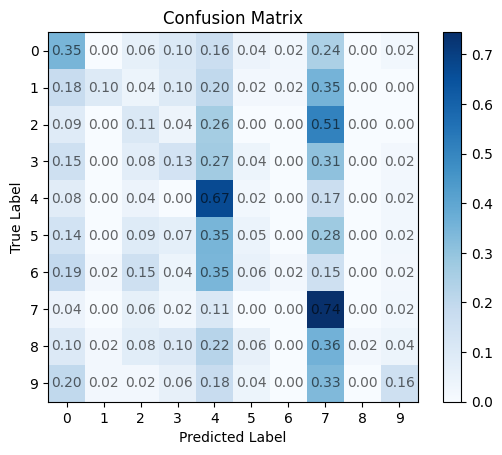

In [302]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:500,0], y_predicted_epanechnikov))

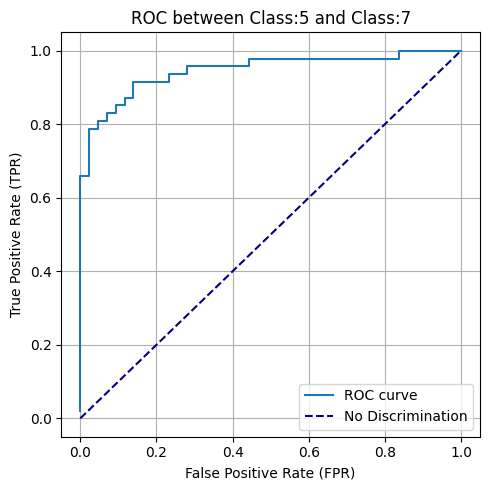

In [309]:
plot_ROC(Y_test_Multiclass[:500,0], y_predicted_gaussian,5,7)

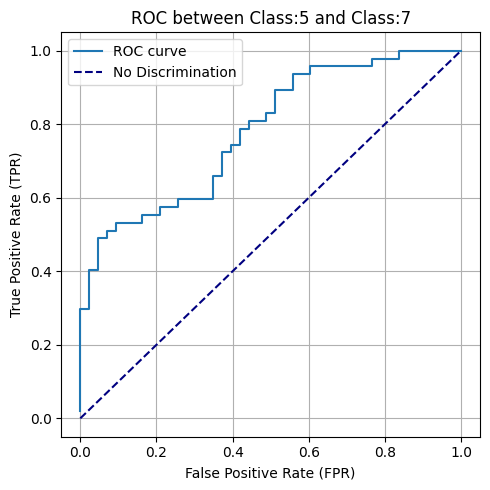

In [310]:
plot_ROC(Y_test_Multiclass[:500,0], y_predicted_uniform,5,7)

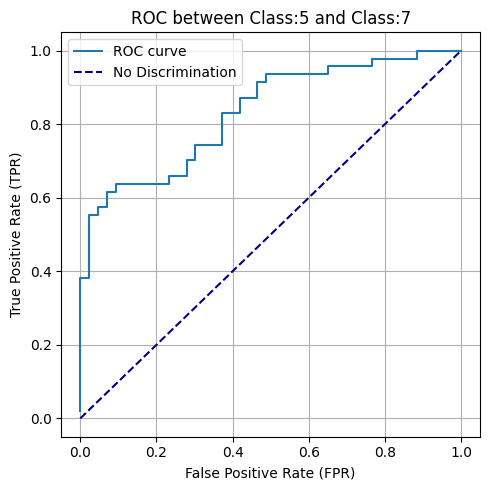

In [311]:
plot_ROC(Y_test_Multiclass[:500,0], y_predicted_epanechnikov,5,7)

#### **K-Nearest Neighbor**

In [252]:
class KNN:
  def __init__(self,k):
    self.k = k

  def euclidean_distance(self,x1,x2):
    return np.linalg.norm(x1-x2)

  def cosine_distance(self,x1,x2):
    return 1 - (np.dot(x1,x2)/(np.linalg.norm(x1)*np.linalg.norm(x2)))

  def fit(self,X_train,y_train):
    self.X_train = X_train
    self.y_train = y_train

  def single_pt_prediction_euclidean(self,data_point):
    distance = [self.euclidean_distance(data_point,train_point) for train_point in self.X_train]
    knn_index_euclidean = np.argsort(distance)[:self.k]

    labels = np.array(self.y_train[knn_index_euclidean]).astype(int)

    unique_values, counts = np.unique(labels, return_counts=True)
    #unique_values, counts = np.unique(labels, return_counts=True)
    result_dict = {i: 0 for i in range(10)}
    for unique_value, count in zip(unique_values, counts):
        result_dict[unique_value] = count

    score = list(result_dict.values())
    probabilities = score/np.sum(score)
    #print(probabilities)
    #return
    # result_dict = dict(zip(unique_values, counts))
    #most_frequent_value = unique_values[np.argmax(counts)]

    return probabilities

  def predict_euclidean(self,X_test):
    checkpoints = [0.25,0.5,0.75]
    predicted_classes = []
    for i,test_point in enumerate(X_test):
        predicted_classes.append(self.single_pt_prediction_euclidean(test_point))
        if(i+1)/X_test.shape[0] in checkpoints:
            print(f'{(i+1)*100/X_test.shape[0]}% complete')

    return np.array(predicted_classes)

  def single_pt_prediction_cosine(self,data_point):
    distance = [self.cosine_distance(data_point,train_point) for train_point in self.X_train]
    knn_index_cosine = np.argsort(distance)[:self.k]

    labels = np.array([self.y_train[i] for i in knn_index_cosine]).astype(int)
    unique_values, counts = np.unique(labels, return_counts=True)
    result_dict = {i: 0 for i in range(10)}
    for unique_value, count in zip(unique_values, counts):
        result_dict[unique_value] = count

    score = list(result_dict.values())
    probabilities = score/np.sum(score)

    #print(unique_values,counts)
    return probabilities
    #most_frequent_value = unique_values[np.argmax(counts)]

    #return counts

  def predict_cosine(self,X_test):

    checkpoints = [0.25,0.5,0.75]
    predicted_classes = []
    for i,test_point in enumerate(X_test):
        predicted_classes.append(self.single_pt_prediction_cosine(test_point))
        if(i+1)/X_test.shape[0] in checkpoints:
            print(f'{(i+1)*100/X_test.shape[0]}% complete')

    return np.array(predicted_classes)

In [253]:
knn = KNN(k = 11)
knn.fit(X_train_Multiclass,Y_train_Multiclass)

In [254]:
y_predicted_euclidean = knn.predict_euclidean(X_test_Multiclass[:100])

25.0% complete
50.0% complete
75.0% complete


In [255]:
y_predicted_cosine = knn.predict_cosine(X_test_Multiclass[:100])

25.0% complete
50.0% complete
75.0% complete


In [256]:
print('Euclidean Distance')
print(f'Classfication Accuracy : {accuracy(Y_test_Multiclass[:100,0], y_predicted_euclidean):.4f}')
print(f'F1 Score : {f1_score(Y_test_Multiclass[:100,0], y_predicted_euclidean):.4f}')

Euclidean Distance
Classfication Accuracy : 0.4400
F1 Score : 0.4248


In [257]:
print('Cosine Distance')
print(f'Classfication Accuracy : {accuracy(Y_test_Multiclass[:100,0], y_predicted_cosine):.4f}')
print(f'F1 Score : {f1_score(Y_test_Multiclass[:100,0], np.array(y_predicted_cosine)):.4f}')

Cosine Distance
Classfication Accuracy : 0.4900
F1 Score : 0.4733


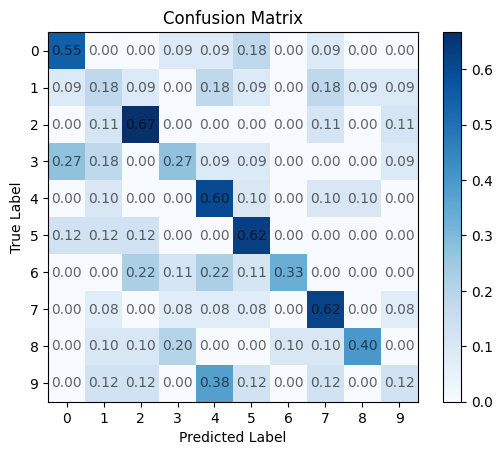

In [258]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:100,0], y_predicted_euclidean))

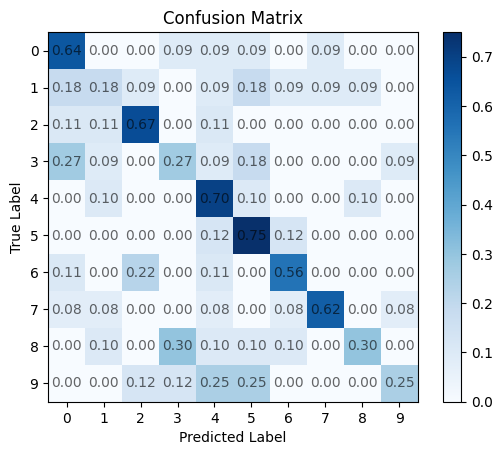

In [259]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:100,0], y_predicted_cosine))

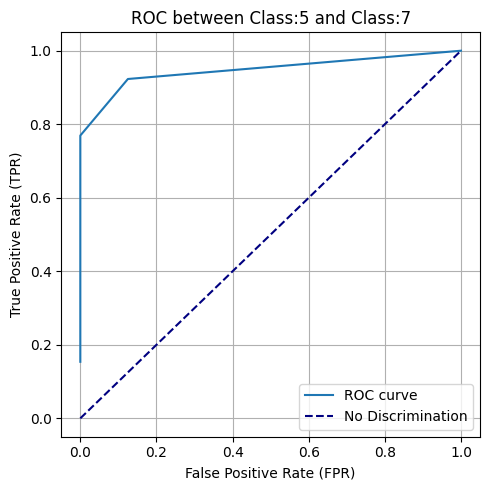

In [261]:
plot_ROC(Y_test_Multiclass[:100,0], y_predicted_cosine,5,7)

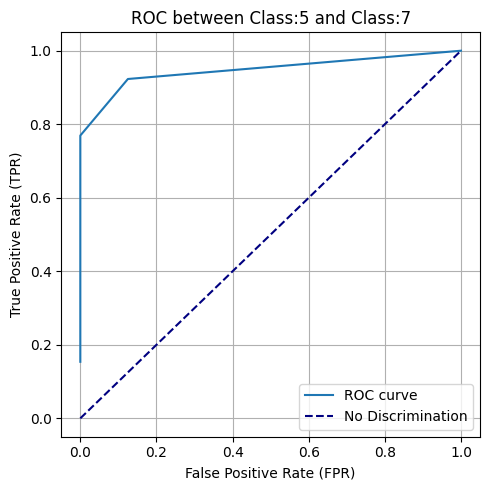

In [262]:
plot_ROC(Y_test_Multiclass[:100,0], y_predicted_cosine,5,7)

#### **Gaussian Mixture Models**

In [60]:
class GMMClassifier:

    def __init__(self):
        # Initialize empty lists and variables to store model parameters
        self.means_list = []  # List to store cluster means for each class
        self.covs_list = []   # List to store cluster covariances for each class
        self.priors_list = [] # List to store priors for each class
        self.num_clusters = None  # Number of clusters
        self.N_Classes = None      # Number of classes
        self.priors = None         # Prior probabilities of classes

    def multivariate_normal_pdf(self,X, mean, cov):
        # Function to compute the probability density function of a multivariate normal distribution
        d = X.shape[1]  # Dimension of the data
        det_cov = np.linalg.det(cov)  # Determinant of the covariance matrix
        inv_cov = np.linalg.inv(cov)  # Inverse of the covariance matrix
        const_term = 1 / np.sqrt((2 * np.pi) ** d * det_cov)  # Constant term in the PDF formula
        exponent_term = np.exp(-0.5 * np.sum(np.dot((X - mean), inv_cov) * (X - mean), axis=1))  # Exponent term in the PDF formula
        return const_term * exponent_term  # Return the computed probabilities

    def EM_algorithm(self,X, num_clusters, max_iters=100, tol=1e-6):
        # Function to perform the Expectation-Maximization algorithm for Gaussian Mixture Models
        n_samples, n_features = X.shape  # Number of samples and number of features

        # Initialize parameters
        np.random.seed(0)  # Set random seed for reproducibility
        mean = X[np.random.choice(n_samples, num_clusters, replace=False)]  # Initialize cluster means randomly
        cov = np.array([np.eye(n_features) for _ in range(num_clusters)])  # Initialize cluster covariances as identity matrices
        pi = np.ones(num_clusters) / num_clusters  # Initialize mixing coefficients

        for _ in range(max_iters):
            # E-step: Compute responsibilities (likelihoods) of each data point belonging to each cluster
            gamma = np.zeros((n_samples, num_clusters))  # Initialize responsibilities matrix
            for k in range(num_clusters):
                gamma[:, k] = pi[k] * self.multivariate_normal_pdf(X, mean[k], cov[k])  # Compute likelihoods
            gamma /= np.sum(gamma, axis=1, keepdims=True)  # Normalize responsibilities

            # M-step: Update parameters based on responsibilities
            prev_mean = mean.copy()  # Save previous mean
            prev_cov = cov.copy()    # Save previous covariance
            prev_pi = pi.copy()      # Save previous mixing coefficients

            Nk = np.sum(gamma, axis=0)  # Compute effective number of points assigned to each cluster
            mean = np.dot(gamma.T, X) / Nk[:, None]  # Update mean
            for k in range(num_clusters):
                cov[k] = np.dot((X - mean[k]).T, np.dot(np.diag(gamma[:, k]), X - mean[k])) / Nk[k]  # Update covariance
            pi = Nk / n_samples  # Update mixing coefficients

            # Check convergence
            mean_change = np.max(np.abs(mean - prev_mean))  # Calculate change in mean
            cov_change = np.max(np.abs(cov - prev_cov))      # Calculate change in covariance
            pi_change = np.max(np.abs(pi - prev_pi))         # Calculate change in mixing coefficients
            if mean_change < tol and cov_change < tol and pi_change < tol:
                break  # If changes are below tolerance, break the loop

        return mean, cov, pi  # Return converged mean, covariance, and mixing coefficients

    def find_parameters(self, X_train, Y_train):
        # Function to find GMM parameters for each class
        means_list = []
        covs_list = []
        priors_list = []

        print('Finding Mixture Models!')
        for label in range(self.N_Classes):
            data = X_train[Y_train[:,0]==label]  # Filter data for the current class
            means, covs, priors = self.EM_algorithm(data, self.num_clusters)  # Perform EM algorithm
            means_list.append(means)
            covs_list.append(covs)
            priors_list.append(priors)
            print(f'Class : {label} done!')

        self.means_list = np.array(means_list)   # Store computed means
        self.covs_list = np.array(covs_list)     # Store computed covariances
        self.priors_list = np.array(priors_list) # Store computed priors

    def calculate_priors(self, Y_train):
        # Calculate prior probabilities of classes
        self.N_Classes = len(np.unique(Y_train))  # Determine number of classes
        self.priors = np.zeros(self.N_Classes)    # Initialize array to store priors

        print('Priors')
        for label in range(self.N_Classes):
            # Count occurrences of each class and divide by total samples
            self.priors[label] = np.sum(Y_train == label) / len(Y_train)
            print(f"Probability of class {label} : {self.priors[label]}")

        print(f"Total Probability : {np.sum(self.priors)}")

    def multivariate_gaussian_pdf(self,x, mean, cov):
        # Compute the probability density function of a multivariate Gaussian distribution
        n = len(mean)
        det_cov = np.linalg.det(cov)
        inv_cov = np.linalg.inv(cov)
        constant = 1.0 / np.sqrt((2*np.pi)**n * det_cov)
        exponent = -0.5 * (x - mean).T @ inv_cov @(x - mean)
        return constant * np.exp(exponent)

    def ccd(self,x,means,covs,priors):
        # Compute the conditional class distribution
        p = 0
        for mean, cov, prior in zip(means, covs, priors):
            p += self.multivariate_gaussian_pdf(x, mean, cov) * prior

        return p

    def fit(self,X_train,Y_train,num_clusters):
        # Fit the model to the training data
        self.num_clusters = num_clusters
        self.calculate_priors(Y_train)     # Calculate prior probabilities
        self.find_parameters(X_train,Y_train)  # Find GMM parameters for each class

    def predict(self,X_test):
        # Predict the class labels for the test data
        pred_y = []
        for data_point in X_test:
            posteriors = []
            for i, (means, covs, alpha) in enumerate(zip(self.means_list, self.covs_list, self.priors_list)):
                posteriors.append(self.ccd(data_point, means, covs, alpha) * self.priors[i])
            predicted_class = posteriors
            pred_y.append(predicted_class)
        pred_y = np.array(pred_y)
        return pred_y


In [207]:
MultiGMM_clf = GMMClassifier()
MultiGMM_clf.fit(X_train_Multiclass,Y_train_Multiclass,num_clusters = 5)

Priors
Probability of class 0 : 0.09928571428571428
Probability of class 1 : 0.09933928571428571
Probability of class 2 : 0.10016071428571428
Probability of class 3 : 0.10173214285714285
Probability of class 4 : 0.10073214285714285
Probability of class 5 : 0.09951785714285714
Probability of class 6 : 0.09994642857142857
Probability of class 7 : 0.0995
Probability of class 8 : 0.09935714285714285
Probability of class 9 : 0.10042857142857142
Total Probability : 1.0
Finding Mixture Models!
Class : 0 done!
Class : 1 done!
Class : 2 done!
Class : 3 done!
Class : 4 done!
Class : 5 done!
Class : 6 done!
Class : 7 done!
Class : 8 done!
Class : 9 done!


In [208]:
pred_y = MultiGMM_clf.predict(X_test_Multiclass)

In [209]:
print(f'Accuracy using GMM , Num_of_Gaussians = {5}')
print(f'Classfication Accuracy : {accuracy(Y_test_Multiclass[:,0], pred_y):.4f}')
print(f'F1 Score : {f1_score(Y_test_Multiclass[:,0], pred_y):.4f}')

Accuracy using GMM , Num_of_Gaussians = 5
Classfication Accuracy : 0.7966
F1 Score : 0.7962


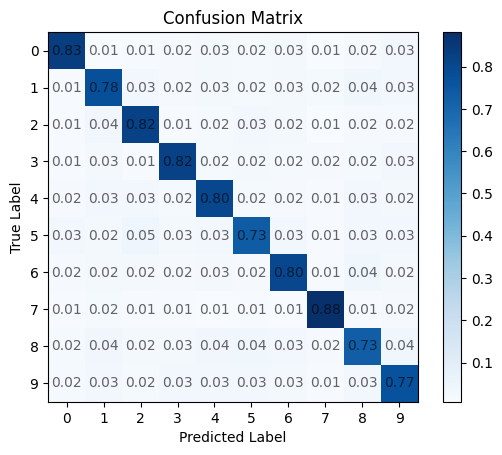

In [210]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:,0], pred_y))

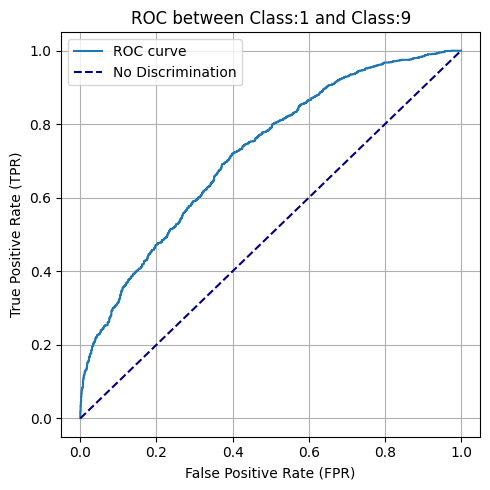

In [211]:
plot_ROC(Y_test_Multiclass[:,0],pred_y, 1, 9)

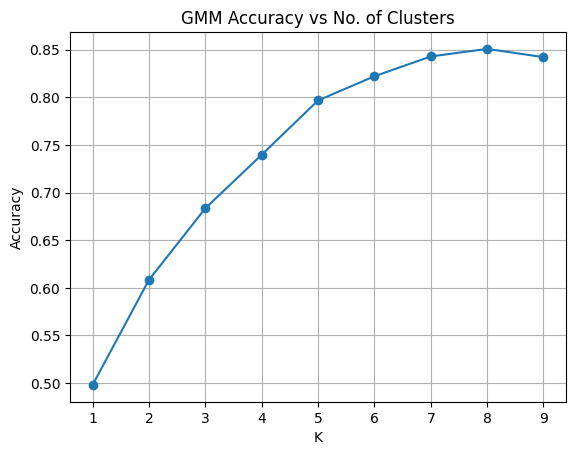

In [212]:
# N values
N_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Accuracy values
accuracy_values = np.array([0.4981, 0.6083, 0.6834, 0.7396, 0.7966, 0.8220, 0.8428, 0.8507, 0.8421])

# Plot Accuracy vs N
plt.plot(N_values, accuracy_values, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('GMM Accuracy vs No. of Clusters')
plt.grid(True)

plt.savefig('GMM Accuracy vs No. of Clusters Multi.svg')

plt.show()

**Accuracy vs Number of Gaussians in a GMM**

* N = 1 Accuracy = 0.4981
* N = 2 Accuracy = 0.6083
* N = 3 Accuracy = 0.6834
* N = 4 Accuracy = 0.7396
* N = 5 Accuracy = 0.7966
* N = 6 Accuracy = 0.8220
* N = 7 Accuracy = 0.8428
* N = 8 Accuracy = 0.8507
* N = 9 Accuracy = 0.8421

**F1 Score vs Number of Gaussians in a GMM**

* N = 1 F1 Score = 0.4950
* N = 2 F1 Score = 0.6080
* N = 3 F1 Score = 0.6832
* N = 4 F1 Score = 0.7393
* N = 5 F1 Score = 0.7962
* N = 6 F1 Score = 0.8216
* N = 7 F1 Score = 0.8425
* N = 8 F1 Score = 0.8505
* N = 9 F1 Score = 0.8420

##### Code to Plot GMMS

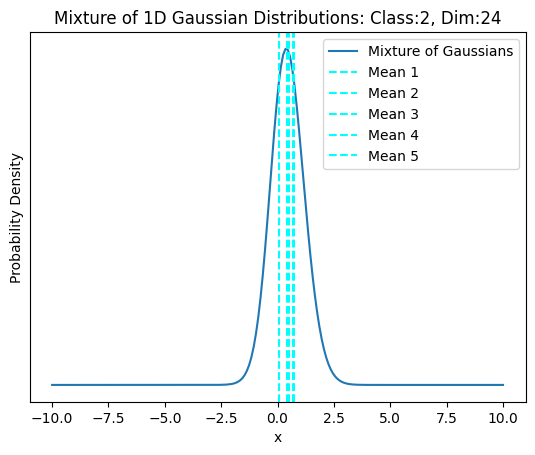

In [219]:
# Code to plot the marginal pdf of GMM

means_list = MultiGMM_clf.means_list
covs_list = MultiGMM_clf.covs_list
priors_list = MultiGMM_clf.priors_list


def marginal_distribution(means, covariances):

    gaussians = np.shape(means)[0]
    dim = np.shape(means)[1]
    marginal_distribution = np.zeros((gaussians, dim, 2))
    for i, mean in enumerate(means):
        # each mean vector should be 25 dimensional
        cov = covariances[i, :, :]
        variances = np.sum(cov, axis = 0)
        for j, value in enumerate(mean):
            mean_each_dimension = value
            var_each_dimension = variances[j]
            param = np.array([mean_each_dimension, var_each_dimension])
            marginal_distribution[i][j] = param

    return marginal_distribution

# Function to plot the gaussian mixture model in 1D
def plot_gaussian_mixture(means, variances, x_min=-10, x_max=10, num_points=200):

  x = np.linspace(x_min, x_max, num_points)
  y_total = np.zeros(len(x))
  i = 0

  for mean, variance in zip(means, variances):
    sigma = np.sqrt(variance)  # Standard deviation
    y = np.exp(-(x - mean) ** 2 / (2 * sigma ** 2)) / (np.sqrt(2 * np.pi) * sigma)
    y_total += y*priors[i]  # Add PDF of each component to the total
    i += 1

  y_total = y_total/np.sum(y_total)
  return x, y_total


class_  = 2
dim = 24

means = means_list[class_,:,:]
covariances = covs_list[class_,:,:,:]
priors = priors_list[class_,:]

marginal_pdf = marginal_distribution(means, covariances)
mean = marginal_pdf[:, dim, 0]
variance = marginal_pdf[:, dim, 1]

x, y_total = plot_gaussian_mixture(mean, variance, -10, 10, 200)

# Plot the mixture of Gaussians
plt.plot(x, y_total, label="Mixture of Gaussians")

# Mark the means with vertical lines and labels
for i, m in enumerate(mean):
    plt.axvline(m, color='cyan', linestyle='dashed', label=f"Mean {i+1}")

# Customize the plot
plt.xlabel("x")
plt.yticks([], [])
plt.ylabel("Probability Density")
plt.title(f"Mixture of 1D Gaussian Distributions: Class:{class_}, Dim:{dim}")
plt.legend()
plt.show()

#### **Linear Classifier**

In [51]:
class Logistic_Regression_multiclass:
  def __init__(self):
    self.coef = None

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def single_fit(self,X_train,Y_train,label,learning_rate=1, threshold=1e-6):

    self.no_of_points =  X_train.shape[0]
    self.no_of_features = X_train.shape[1]

    X_train = np.insert(X_train, self.no_of_features, 1, axis=1)

    # Initialize W:
    np.random.seed(0)
    W = np.random.rand(self.no_of_features + 1) * np.sqrt(1./(self.no_of_features + 1))
    # W = np.zeros(self.no_of_features + 1) * np.sqrt(1./(self.no_of_features + 1))
    W = W.reshape(-1,1)
    no_of_iterations = 300

    cost_list = []
    for _ in range(no_of_iterations):

      Y_hat = self.sigmoid(X_train @ W)
      Y_hat = Y_hat.reshape(-1,1)

      # cost function
      cost = -(1/self.no_of_points) * np.sum(Y_train * np.log(Y_hat) + (1 - Y_train) * np.log((1 - Y_hat)))
      # gradient
      gradient = (1/self.no_of_points)*(X_train.T @ (Y_hat - Y_train))
    #   print(gradient.shape)
    #   gradient = gradient.reshape(-1,1)

      W = W - learning_rate*gradient

      #return
      cost_list.append(cost)

    #   if (_%50 == 0):
    print( f"Class {int(label)}: Iterations : {_+1} , Cost = {cost}")

    return W

  def fit(self,X_train,Y_train):
    classes = np.unique(Y_train)
    W_matrix = []
    for i,label in enumerate(classes):
      temp_binary = (Y_train.copy() == classes[i]).astype(int)
      W_matrix.append(self.single_fit(X_train,temp_binary,label))
    W_matrix = np.array(W_matrix)
    W_matrix = np.squeeze(W_matrix, axis=2)

    self.coef = W_matrix
    # print(W_matrix.shape)
    #return W_matrix

  def predict(self,X_test):
    X_test = np.insert(X_test, self.no_of_features, 1, axis=1)  # Add bias term
    probabilities = []
    for w in self.coef:
        w = w.reshape(-1,1)
        Z = np.dot(X_test, w)
        Z = Z.reshape(-1,1)

        prob = self.sigmoid(Z)

        probabilities.append(prob)
    probabilities = np.array(probabilities)

    probabilities = np.squeeze(probabilities, axis=2)

    return probabilities.T

In [52]:
lr_over = Logistic_Regression_multiclass()
lr_over.fit(X_train_Multiclass,Y_train_Multiclass)

Class 0: Iterations : 300 , Cost = 0.2845615323983499
Class 1: Iterations : 300 , Cost = 0.2958198660661036
Class 2: Iterations : 300 , Cost = 0.30388342897696824
Class 3: Iterations : 300 , Cost = 0.2844014903975181
Class 4: Iterations : 300 , Cost = 0.28966763077506436
Class 5: Iterations : 300 , Cost = 0.3014076957933372
Class 6: Iterations : 300 , Cost = 0.2805891606973359
Class 7: Iterations : 300 , Cost = 0.2798184629334764
Class 8: Iterations : 300 , Cost = 0.2972818533731061
Class 9: Iterations : 300 , Cost = 0.2878398706614083


In [53]:
y_predicted_train = lr_over.predict(X_train_Multiclass)
y_predicted_test = lr_over.predict(X_test_Multiclass)

In [54]:
print(f'Training Accuracy : {accuracy(Y_train_Multiclass[:,0],y_predicted_train):0.3f}')
print(f'Testing Accuracy : {accuracy(Y_test_Multiclass[:,0],y_predicted_test):0.3f}')

Training Accuracy : 0.305
Testing Accuracy : 0.303


In [55]:
print(f'Training F1 Score : {f1_score(Y_train_Multiclass[:,0],y_predicted_train):0.3f}')
print(f'Testing F1 Score : {f1_score(Y_test_Multiclass[:,0],y_predicted_test):0.3f}')

Training F1 Score : 0.301
Testing F1 Score : 0.298


In [56]:
print(f'Emperical Loss on Train Data: {categorical_crossentropy_loss(Y_train_Multiclass[:,0].astype(int),y_predicted_train):0.3f}')
print(f'Emperical Loss on Test Data: {categorical_crossentropy_loss(Y_test_Multiclass[:,0].astype(int),y_predicted_test):0.3f}')

Emperical Loss on Train Data: 1.983
Emperical Loss on Test Data: 1.988


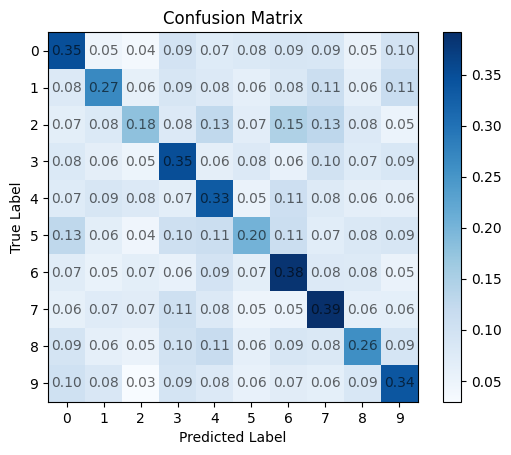

In [58]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:,0],y_predicted_test))

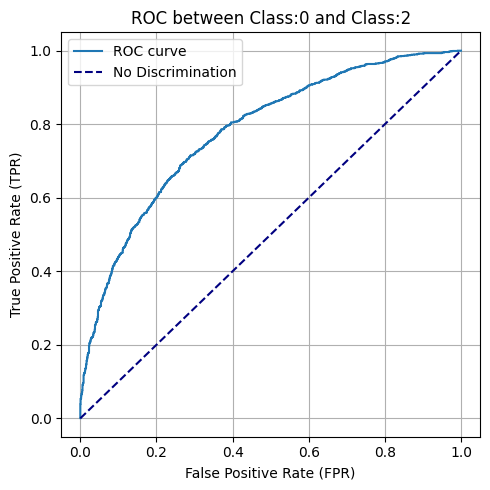

In [59]:
plot_ROC(Y_test_Multiclass[:,0],y_predicted_test, 0, 2)


**Testing Accuracy**
* Learning Rate - 0.001 Accuracy - 0.262
* Learning Rate - 0.01 Accuracy - 0.285
* Learning Rate - 0.1 Accuracy - 0.296
* Learning Rate - 1 Accuracy - 0.303

**F1 Score**
* Learning Rate - 0.001 F1 Score - 0.240
* Learning Rate - 0.01 F1 Score - 0.274
* Learning Rate - 0.1 F1 Score - 0.291
* Learning Rate - 1 F1 Score - 0.298

**Emperical Loss on Testing**

* Learning Rate - 0.001 Emperical Loss - 0.578
* Learning Rate - 0.01 Emperical Loss - 2.022
* Learning Rate - 0.1 Emperical Loss - 2.000
* Learning Rate - 1 Emperical Loss - 1.988

**Emperical Loss on Training**

* Learning Rate - 0.001 Emperical Loss - 0.578
* Learning Rate - 0.01 Emperical Loss - 2.020
* Learning Rate - 0.1 Emperical Loss - 1.993
* Learning Rate - 1 Emperical Loss - 1.983